#Data-Driven Dribbles

# Introduction

The [European Soccer Database](https://www.kaggle.com/datasets/hugomathien/soccer/data) on Kaggle is a comprehensive dataset containing detailed information on European soccer matches, teams, and players from 2008 to 2016. It includes data on 25,000 matches, 10,000 players, and team statistics across multiple leagues in 11 countries. The dataset is made up of seven tables (Country, League, Match, Player, Player Attributes, Team, and TeamAttributes) with a total of 199 columns. This is an incredibly comprehensive and fun dataset which will offer insights into the most popular sport in the world!
The project has the following objectives to gather an better understanding in the world of soccer players:

1. Player Clustering by Position Use clustering algorithms to group players by position based on their stats.
2. Predict Match outcomes.
3. Predict Player Overall ratings
4. Understanding the age of Peak Player Performance
5. Develop a pipeline to visualize player geography based on similarity with respect to one player.


# 1. Data Setup for Project

## 1.1 Save data in google drive

Some of this code will require the user to have data in their private drive.
We utilized the below drive for much our analysis. You can access the files and modify your respective google drive paths if you wish to run this notebook

- Click on [this](https://drive.google.com/drive/folders/1cAaDgDKdMbl3AibAyL2x9_gpTulrT91t?usp=drive_link) google drive link for drive.
- Right click the "Data_Driven_Dribbles_project", choose "MyDrive" and click "Add ShortCut".
- After finishing your session, you may delete the "Data_Driven_Dribbles_project" folder from the private google drive.

## 1.2 Imports and Load Data

Import all libraries that are required for the project. \

In [ ]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.display import display
from scipy.spatial.distance import cdist

## 1.3 Import European Soccer dataset from Kaggle

Import Kagglehub to download dataset from Kaggle. Download the Kaggle dataset for European Soccer Database using the following instructions.

To get the data in here:

Go to this [Kaggle link](https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com) and create a Kaggle account (unless you already have one)
Go to Account and click on "Create New API Token" to get the API key in the form of a json file kaggle.json
Upload the kaggle.json file to the default location in your Google Drive, 'MyDrive'.

In [ ]:
import kagglehub

In [ ]:
%%capture
!apt update
!pip install kaggle

In [ ]:
prefix= '/content/drive'
from google.colab import drive
drive.mount(prefix, force_remount=True)

Mounted at /content/drive


In [ ]:
# Create the kaggle directory and
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

## 1.4 Download European Soccer Database from Kaggle

Download the European Soccer Database from Kaggle. This will be the main dataset we will be using for this project.

In [ ]:
# Download dataset
!!kaggle datasets download -d hugomathien/soccer

['Dataset URL: https://www.kaggle.com/datasets/hugomathien/soccer',
 'License(s): ODbL-1.0',
 'Downloading soccer.zip to /content',
 '',
 '  0% 0.00/32.7M [00:00<?, ?B/s]',
 ' 12% 4.00M/32.7M [00:00<00:00, 37.5MB/s]',
 ' 37% 12.0M/32.7M [00:00<00:00, 54.8MB/s]',
 ' 58% 19.0M/32.7M [00:00<00:00, 61.9MB/s]',
 ' 76% 25.0M/32.7M [00:00<00:00, 33.7MB/s]',
 ' 92% 30.0M/32.7M [00:00<00:00, 34.3MB/s]',
 '',
 '100% 32.7M/32.7M [00:00<00:00, 37.6MB/s]']

## 1.5 Download the Transfer Market dataset

Download the TransferMarket Dataset from Kaggle to enrich our dataset with Market values of players.

In [ ]:
# Download latest version
!!kaggle datasets download davidcariboo/player-scores

['Dataset URL: https://www.kaggle.com/datasets/davidcariboo/player-scores',
 'License(s): CC0-1.0',
 'Downloading player-scores.zip to /content',
 '',
 '  0% 0.00/162M [00:00<?, ?B/s]',
 '  3% 5.00M/162M [00:00<00:03, 51.9MB/s]',
 '  6% 10.0M/162M [00:00<00:03, 49.9MB/s]',
 ' 10% 17.0M/162M [00:00<00:02, 56.6MB/s]',
 ' 18% 29.0M/162M [00:00<00:01, 80.7MB/s]',
 ' 23% 37.0M/162M [00:00<00:01, 70.0MB/s]',
 ' 31% 50.0M/162M [00:00<00:01, 89.1MB/s]',
 ' 39% 64.0M/162M [00:00<00:00, 104MB/s] ',
 ' 49% 79.0M/162M [00:00<00:00, 116MB/s]',
 ' 56% 91.0M/162M [00:01<00:00, 103MB/s]',
 ' 63% 102M/162M [00:01<00:00, 91.1MB/s]',
 ' 69% 112M/162M [00:01<00:00, 79.0MB/s]',
 ' 75% 122M/162M [00:01<00:00, 84.7MB/s]',
 ' 81% 132M/162M [00:01<00:00, 88.3MB/s]',
 ' 88% 143M/162M [00:01<00:00, 93.8MB/s]',
 ' 94% 153M/162M [00:01<00:00, 86.1MB/s]',
 '',
 '100% 162M/162M [00:01<00:00, 87.6MB/s]']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzip folder in Colab content folder
!unzip soccer.zip

Archive:  soccer.zip
  inflating: database.sqlite         


In [ ]:
!unzip player-scores.zip

Archive:  player-scores.zip
  inflating: appearances.csv         
  inflating: club_games.csv          
  inflating: clubs.csv               
  inflating: competitions.csv        
  inflating: game_events.csv         
  inflating: game_lineups.csv        
  inflating: games.csv               
  inflating: player_valuations.csv   
  inflating: players.csv             
  inflating: transfers.csv           


In [ ]:
import sqlite3

con= sqlite3.connect('database.sqlite')

In [ ]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", con)
print(tables)

                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes


##1.6 Save the information to dataframes

Saved the following csv files into dataframes from player_scores.zip. \
players: contains player information \
player_valuations: contains the player valuations. \

In [ ]:
transfermarkt_players_df = pd.read_csv('players.csv')
transfermarkt_player_valuations_df = pd.read_csv('player_valuations.csv')

In [ ]:
transfermarkt_game_events_df = pd.read_csv('game_events.csv')
transfermarkt_games_df = pd.read_csv('games.csv')

Saved the tables from sqllite database into dataframe for Exploratory Data Analysis. We created the following dataframes \
player_df : contains the player information \
match_df : contains the match information  \
league_df : contains the league information  \
country_df: lists the countries \
team_df: contains the team information \
team_attributes_df: contains team attributes \
player_attributes_df: contains player attributes \


In [ ]:
player_df = pd.read_sql('''SELECT *
                          FROM Player;''',con)
match_df = pd.read_sql('''SELECT *
                          FROM Match;''',con)
league_df = pd.read_sql('''SELECT *
                          FROM League;''',con)
country_df = pd.read_sql('''SELECT *
                          FROM Country;''',con)
team_df = pd.read_sql('''SELECT *
                          FROM Team;''',con)
# From Harry - not sure if we meant to set team_attributes = player_df but it's throwing off the below df and making team_attributes_df return the same thing as players_df
# team_attributes_df = player_df = pd.read_sql('''SELECT *
#                           FROM Team_Attributes;''',con)
team_attributes_df = pd.read_sql('''SELECT *
                          FROM Team_Attributes;''',con)
player_attributes_df = pd.read_sql(''' SELECT *
                        FROM Player_Attributes;''', con)

In [ ]:
player_df.head(5)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [ ]:
player_attributes_df.head(5)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
team_attributes_df.head(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


# 2. EDA

Perform Exploratory Data Analysis to understand the dataset and identify the transformations needed for analysis.

## 2.1 Player Dataset

In [ ]:
print("Player Dataset Shape")
print(player_df.shape)

Player Dataset Shape
(11060, 7)


In [ ]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [ ]:
# player_df= player_df.drop(columns=['buildUpPlayDribbling'])

## 2.2 Player Position from wiki

Use the player_name field in player_df and check the wiki page for the player to obtain the position they play.

1. Obtain Player's Position info by scrapping the wiki pages of players and update Players dataframe.
2. Export this dataframe as csv. The lookup to wiki takes long time to run so export as csv for quick update.
3. Import csv as dataframe to join with Players_attributes dataframe

WARNING: This code takes longer to run. We have uploaded a csv file in google drive folder that contains the output from this export.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
import requests


def find_position(player_name):
  try:
    URL = 'https://en.wikipedia.org/wiki/' + player_name.replace(' ','_')
    page = requests.get(URL)
    page.raise_for_status()
    soup = BeautifulSoup(page.text, 'html.parser')
    class_list = soup.find(class_="infobox-data role")
    return class_list.text[1:]
  except :
    return None

# The output of the following code has been saved as a Players.csv in the "CIS5450_project" folder
#player_df['position'] = player_df['player_name'].apply(lambda x:find_position(x))




In [ ]:
# Download the players.csv from the google folder. The read statement has been commented to allow the notebook to run
# if the file has been copied to the colab folder
file_path = '/content/drive/MyDrive/CIS5450_project/players.csv'
players_positions_df = pd.read_csv(file_path)

In [ ]:
player_df.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


Let's look at correlations

In [ ]:
numeric_player_df= player_df.select_dtypes(include=np.number)

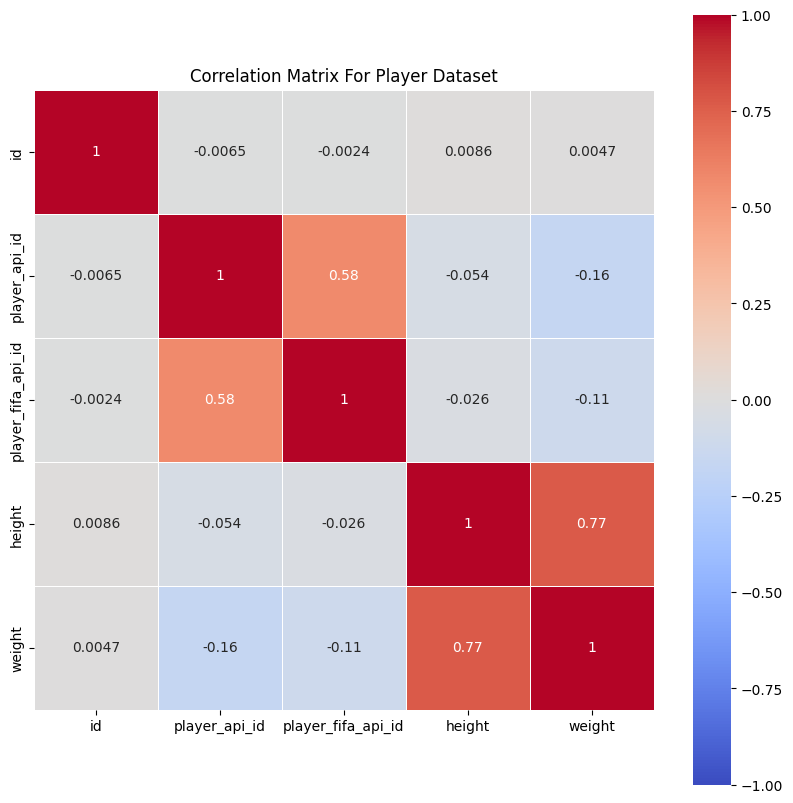

In [ ]:
corr_matrix = numeric_player_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='coolwarm', annot=True, vmin = -1, vmax = 1, square=True, center = 0, linewidths=0.5)
plt.title('Correlation Matrix For Player Dataset')
plt.show()

## 2.3 Team Dataset

Exploration of the Team dataset to identify information relevant to the objectives of the project.

In [ ]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


We have ten nulls in the team-fifa column but that should not matter right now

In [ ]:
team_attributes_df.shape

(1458, 25)

In [ ]:
team_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

This dataset seems to mirror the player dataset- let's make sure they aren't identical

In [ ]:
team_attributes_df.head(10)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
5,6,77,8485,2012-02-22 00:00:00,58,Balanced,NaN,Little,62,Mixed,...,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
6,7,77,8485,2013-09-20 00:00:00,62,Balanced,NaN,Little,45,Mixed,...,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
7,8,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,...,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,9,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
9,10,614,8576,2010-02-22 00:00:00,60,Balanced,NaN,Little,40,Mixed,...,55,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap


Seems like 'buildupplaydribbling' is the only column that contains nulls - let's drop that column for now, though at a later point if we want it we can decide on an imputation method

In [ ]:
team_attributes_df= team_attributes_df.drop(columns=['buildUpPlayDribbling'])

Let's look at the unique columns for each of the 'class' attributes


In [ ]:
for col in team_attributes_df.columns:
  if col.endswith('Class') and col[0:-5] in team_attributes_df.columns:
    print(col)
    print(team_attributes_df[col].unique())
    print('\n')

buildUpPlaySpeedClass
['Balanced' 'Fast' 'Slow']


buildUpPlayPassingClass
['Mixed' 'Long' 'Short']


chanceCreationPassingClass
['Normal' 'Risky' 'Safe']


chanceCreationCrossingClass
['Normal' 'Lots' 'Little']


chanceCreationShootingClass
['Normal' 'Lots' 'Little']


defencePressureClass
['Medium' 'Deep' 'High']


defenceAggressionClass
['Press' 'Double' 'Contain']


defenceTeamWidthClass
['Normal' 'Wide' 'Narrow']




In [ ]:
team_attributes_df['date']= pd.to_datetime(team_attributes_df['date'])

In [ ]:
numeric_player_df

,id,player_api_id,player_fifa_api_id,height,weight
0,1,505942,218353,182.88,187
1,2,155782,189615,170.18,146
2,3,162549,186170,170.18,163
3,4,30572,140161,182.88,198
4,5,23780,17725,182.88,154
...,...,...,...,...,...
11055,11071,26357,2488,182.88,168
11056,11072,111182,164680,182.88,176
11057,11073,36491,111191,180.34,154
11058,11074,35506,47058,185.42,172


In [ ]:
numeric_team_df= team_attributes_df.select_dtypes(include=np.number)

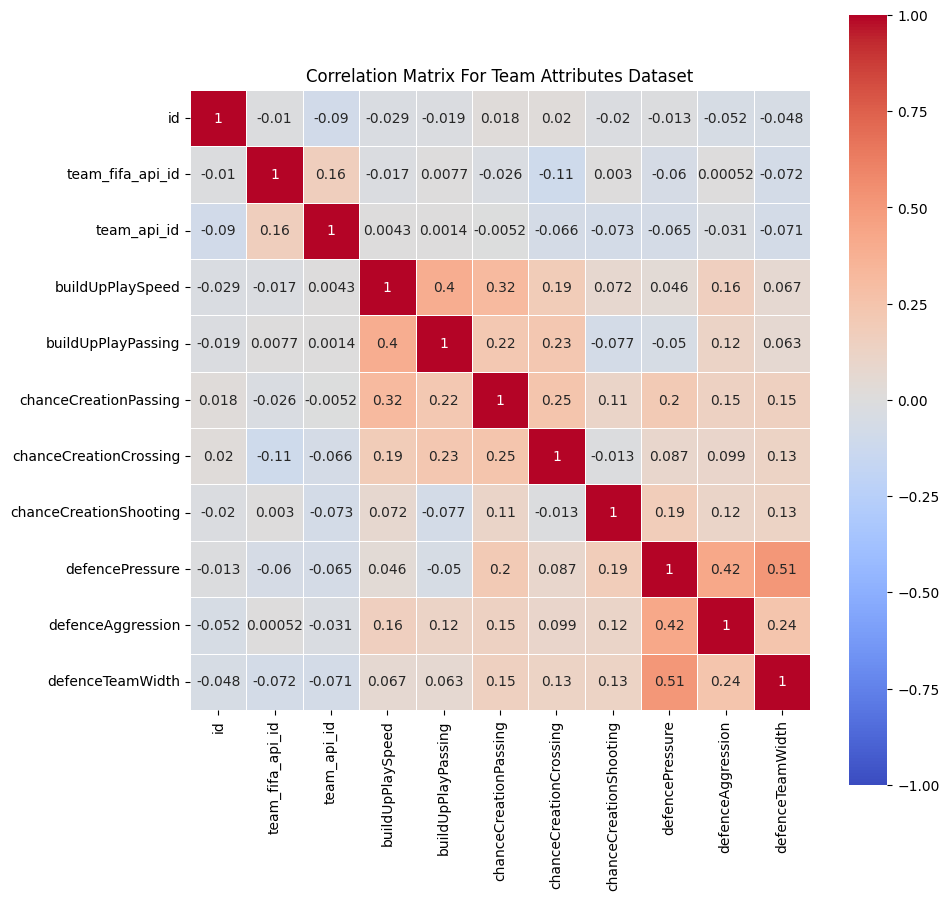

In [ ]:
corr_matrix = numeric_team_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='coolwarm', annot=True, vmin = -1, vmax = 1, square=True, center = 0, linewidths=0.5)
plt.title('Correlation Matrix For Team Attributes Dataset')
plt.show()

Notable Correlations:
*   defensive features
*   buildUpPlayPassing and buildUpPlaySpeed

## 2.4 Match Dataset

Exploration of the Match dataset to identify information relevant to the objectives of the project. Predicting Match outcomes was one of the objectives for the project.

In [ ]:
match_df.columns.tolist()

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [ ]:
match_df.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [ ]:
match_df.shape

(25979, 115)

In [ ]:
match_df.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [ ]:
match_df.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

## 2.5 Player Attributes Dataset

Exploration of the Player Attributes dataset to identify information relevant to the objectives of the project. Predicting Player rating was one of the objectives for the project.

In [ ]:
player_attributes_df.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [ ]:
# many ids map more that one times
non_unique_count = player_attributes_df['player_fifa_api_id'].value_counts()
non_unique_count = non_unique_count[non_unique_count > 1].sum()
print(non_unique_count)

183978


In [ ]:
player_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [ ]:
player_attributes_df.shape

(183978, 42)

In [ ]:
player_attributes_df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [ ]:
player_attributes_df['date']= pd.to_datetime(player_attributes_df['date'])

In [ ]:
numeric_player_attributes_df= player_attributes_df.select_dtypes(include=np.number)

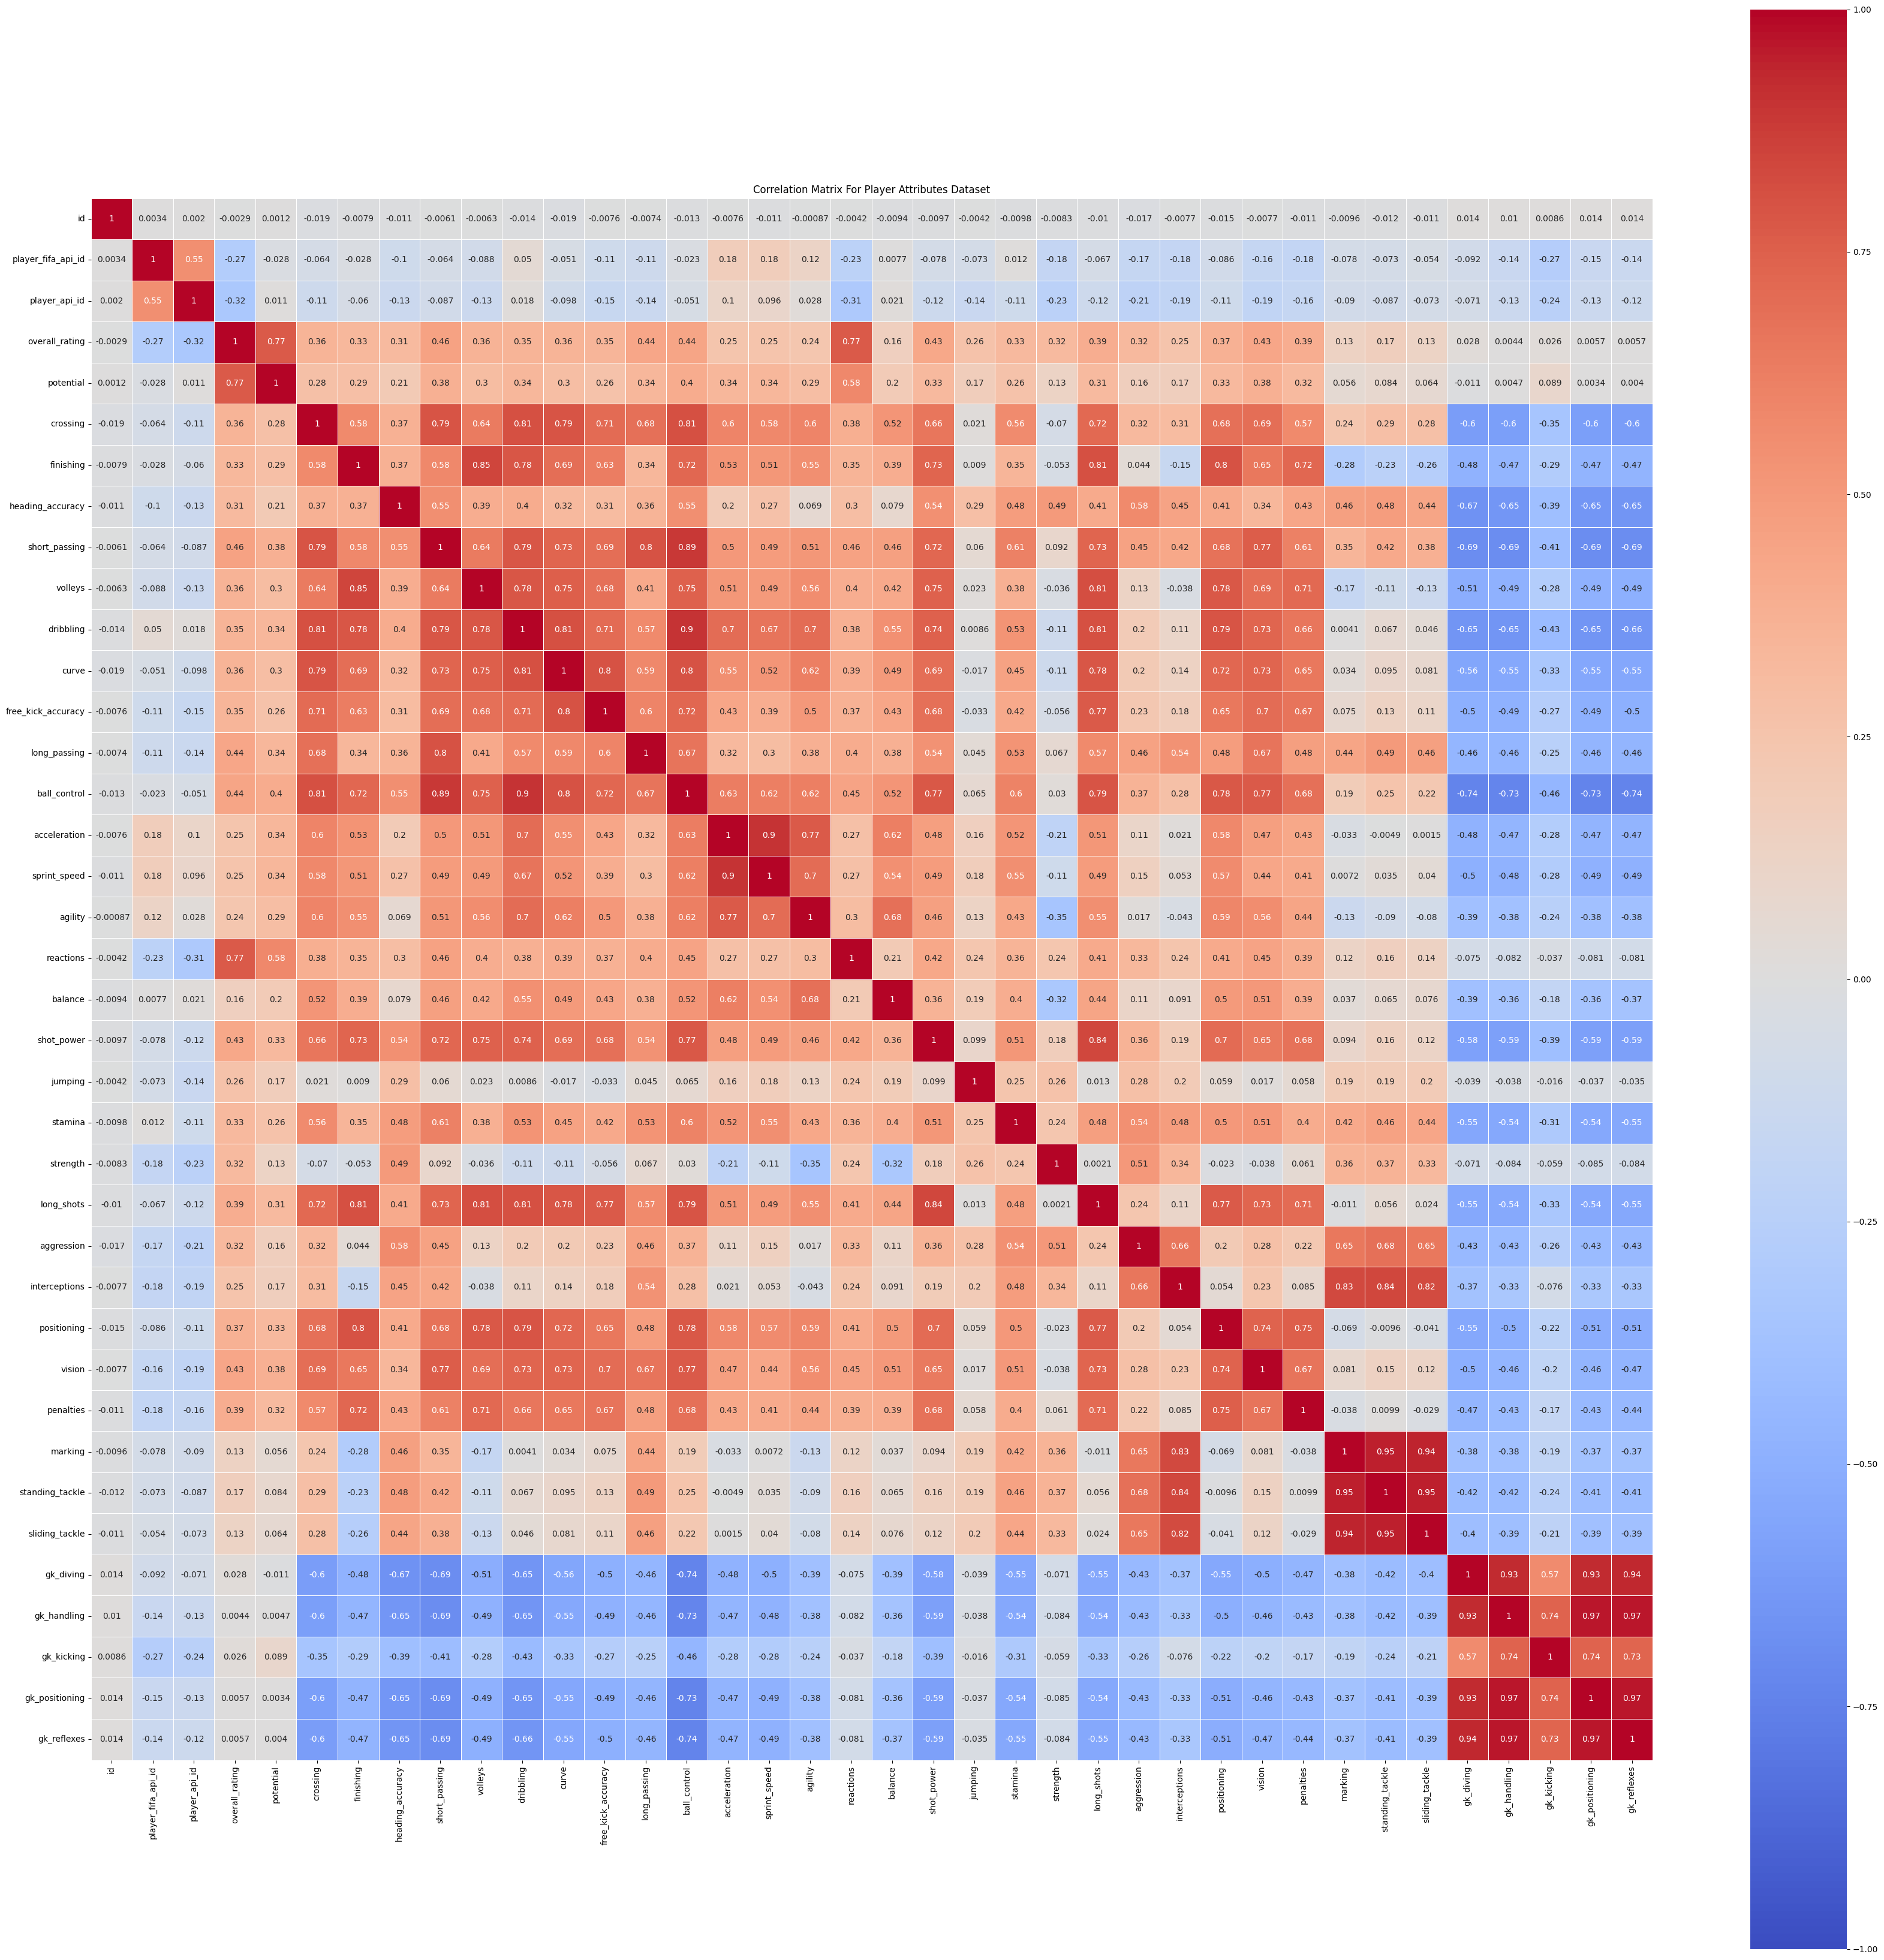

In [ ]:
corr_matrix = numeric_player_attributes_df.corr()
plt.figure(figsize=(42,42))
sns.heatmap(corr_matrix,cmap='coolwarm', annot=True, vmin = -1, vmax = 1, square=True, center = 0, linewidths=0.5)
plt.title('Correlation Matrix For Player Attributes Dataset')
plt.show()

Some Notable Correlations:
* positioning and long finishing
* ball control and short passing
* long shots and shot power
* marking and interceptions
* standing tackle and interceptions
* sliding tackle and interceptions
* finishing and volleys
* goalkeeping in general and tackling/marking



In [ ]:
league_df

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [ ]:
numeric_player_attributes_df

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,83.0,85.0,84.0,77.0,59.0,89.0,77.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,78.0,80.0,74.0,76.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,77.0,80.0,74.0,71.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,78.0,81.0,74.0,64.0,57.0,86.0,77.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


## 2.6 Market Value Dataset

Exploration of the Market Value dataset to identify information relevant to the objectives of the project.

In [ ]:
# As we are using two different sources for market value, we need to connect them

transfermarkt_players_df.head(10)


,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
5,109,NaN,Dedê,Dedê,2013,825,dede,Brazil,Belo Horizonte,Brazil,...,NaN,NaN,NaN,Football Concept,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dede/profil/sp...,TR1,Eskisehirspor,400000.0,9500000.0
6,123,Christoph,Metzelder,Christoph Metzelder,2012,33,christoph-metzelder,Germany,Haltern,Germany,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/christoph-metz...,L1,FC Schalke 04,1500000.0,9500000.0
7,132,Tomas,Rosicky,Tomas Rosicky,2015,11,tomas-rosicky,CSSR,Praha,Czech Republic,...,both,179.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tomas-rosicky/...,GB1,Arsenal Football Club,350000.0,17500000.0
8,162,Marc,Ziegler,Marc Ziegler,2012,79,marc-ziegler,Germany,Blieskastel,Germany,...,right,193.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/marc-ziegler/p...,L1,Verein für Bewegungsspiele Stuttgart 1893,200000.0,1250000.0
9,215,Roque,Santa Cruz,Roque Santa Cruz,2015,1084,roque-santa-cruz,Paraguay,Asunción,Paraguay,...,right,193.0,2023-12-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roque-santa-cr...,ES1,Málaga CF,250000.0,12000000.0


In [ ]:
player_df.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


In [ ]:
player_df[['first_name', 'last_name']] = player_df['player_name'].str.split(' ', n=1, expand=True)

In [ ]:
player_df.head(2)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,first_name,last_name
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,Aaron,Appindangoye
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,Aaron,Cresswell


In [ ]:
#  Ensure date_of_birth and birthday columns are both in datetime format
transfermarkt_players_df['date_of_birth'] = pd.to_datetime(transfermarkt_players_df['date_of_birth'])
player_df['birthday'] = pd.to_datetime(player_df['birthday'])

player_df.head(3)


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,first_name,last_name
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,Aaron,Appindangoye
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,Aaron,Cresswell
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163,Aaron,Doran


In [ ]:
transfermarkt_players_df.head(3)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0


In [ ]:
transfermarkt_players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32419 entries, 0 to 32418
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             32419 non-null  int64         
 1   first_name                            30360 non-null  object        
 2   last_name                             32419 non-null  object        
 3   name                                  32419 non-null  object        
 4   last_season                           32419 non-null  int64         
 5   current_club_id                       32419 non-null  int64         
 6   player_code                           32419 non-null  object        
 7   country_of_birth                      29624 non-null  object        
 8   city_of_birth                         29964 non-null  object        
 9   country_of_citizenship                32039 non-null  object        
 10

# 3. Data Integration

## 3.1 Player Market Value

In [ ]:
# Merge on names and exact match of year, month, and day of birthdate
transfer_value_with_id = transfermarkt_players_df.merge(
    player_df,
    left_on=['first_name', 'last_name', 'date_of_birth'],
    right_on=['first_name', 'last_name', 'birthday'],
    how='inner'  # Use 'inner' to keep only matched rows
)

# Display the merged DataFrame
transfer_value_with_id.shape

(5062, 30)

## 3.2 Match Player Attributes to Player Positions

We first tried a join with the transfermarkt_players_df and  our player attributes because the original player attributes dataset did not have positions. We found that this was suboptimal though because we found that there were much fewer entries when we merged them together (only about 5000). Additionally, we found that with the 5000 entries, our feature modeling was still a bit inaccurate. That's why we aimed to do some webscraping from wikipedia and see if we could get a larger dataset which we ultimately did use (11000 unique rows matched to each player + position)

In [ ]:
# 5000 names that we can use to do analysis on, TO:DO, join this with their fifa data of THAT YEAR

transfer_player_attributes_with_id = transfer_value_with_id.merge(
    player_attributes_df,
    left_on=['player_fifa_api_id', 'player_api_id'],
    right_on=['player_fifa_api_id', 'player_api_id'],
    how = 'inner'
)

In [ ]:
transfer_player_attributes_with_id

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,64.0,77.0,16.0,26.0,22.0,4.0,13.0,12.0,9.0,9.0
1,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,64.0,81.0,16.0,26.0,22.0,4.0,13.0,12.0,9.0,9.0
2,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,64.0,81.0,16.0,26.0,22.0,4.0,13.0,12.0,9.0,9.0
3,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,64.0,81.0,16.0,26.0,22.0,4.0,13.0,12.0,9.0,9.0
4,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,63.0,81.0,15.0,27.0,19.0,4.0,13.0,12.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96930,400485,Adam,Ounas,Adam Ounas,2023,1082,adam-ounas,France,Chambray-lès-Tours,Algeria,...,61.0,54.0,44.0,54.0,47.0,8.0,6.0,8.0,7.0,12.0
96931,411287,Justin,Hoogma,Justin Hoogma,2024,1304,justin-hoogma,Netherlands,Enschede,Netherlands,...,28.0,35.0,57.0,69.0,62.0,11.0,13.0,14.0,7.0,9.0
96932,411287,Justin,Hoogma,Justin Hoogma,2024,1304,justin-hoogma,Netherlands,Enschede,Netherlands,...,28.0,35.0,57.0,66.0,60.0,11.0,13.0,14.0,7.0,9.0
96933,411287,Justin,Hoogma,Justin Hoogma,2024,1304,justin-hoogma,Netherlands,Enschede,Netherlands,...,28.0,35.0,53.0,62.0,60.0,11.0,13.0,14.0,7.0,9.0


In [ ]:
transfer_value_with_id[['first_name', 'last_name', 'country_of_birth', 'date_of_birth', 'player_api_id', 'player_fifa_api_id', 'market_value_in_eur']].head(10)

,first_name,last_name,country_of_birth,date_of_birth,player_api_id,player_fifa_api_id,market_value_in_eur
0,Miroslav,Klose,Poland,1978-06-09,30638,11141,1000000.0
1,Roman,Weidenfeller,Germany,1980-08-06,27358,2196,750000.0
2,Dimitar,Berbatov,Bulgaria,1981-01-30,27430,30110,1000000.0
3,Tom,Starke,East Germany (GDR),1981-03-18,33473,107713,100000.0
4,Christoph,Metzelder,Germany,1980-11-05,30649,30663,1500000.0
5,Tomas,Rosicky,CSSR,1980-10-04,31435,8473,350000.0
6,Marc,Ziegler,Germany,1976-06-13,36054,107103,200000.0
7,Roque,Santa Cruz,Paraguay,1981-08-16,30646,25798,250000.0
8,Gerald,Asamoah,Ghana,1978-10-03,30702,11125,100000.0
9,Tomas,Ujfalusi,CSSR,1978-03-24,30689,44902,300000.0


In [ ]:
display(player_df.shape)
display(player_attributes_df.shape)

(11060, 9)

(183978, 42)

In [ ]:
player_df_unique = player_df['player_api_id'].unique()
player_attributes_df_unique = player_attributes_df['player_api_id'].unique()
if len(player_df_unique) == len(player_attributes_df_unique):
  print('Player_api_ids contained in player and player_attributes match exactly')
else:
  print('Player_api_ids contained in datasets do not match')

Player_api_ids contained in player and player_attributes match exactly


Using Webscraped data from player_positions_df to form the new_players_positions_df that we can use

In [ ]:
new_players_positions_df = players_positions_df.merge(player_attributes_df,
    left_on=['player_fifa_api_id', 'player_api_id'],
    right_on=['player_fifa_api_id', 'player_api_id'],
    how = 'inner'
)

In [ ]:
new_players_positions_df

,Unnamed: 0,id_x,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,position,id_y,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,Centre back,1,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,Centre back,2,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,Centre back,3,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,Centre back,4,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,Centre back,5,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183761,11059,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,Attacking midfielder,183974,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183762,11059,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,Attacking midfielder,183975,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183763,11059,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,Attacking midfielder,183976,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183764,11059,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,Attacking midfielder,183977,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


## 3.3 Other Integration

In [ ]:
player_merge_left= pd.merge(player_df, player_attributes_df, on='player_api_id', how='left')
player_merge_left.shape

(183978, 50)

# 4. Player Rating Modeling

## 4.1 Feature Engineering

We can see that the numeric_player_attributes_df has multiple ratings for a player based on when the player was rated (similar to a FIFA ranking based on year - a player can have a different rating in 2015 compared to their rating in 2016). To simplify for now, let's just take the most recent rating date of a player for our initial feature engineering. Then we can compare the peaks of every player as well as the average of every player and see how they stack up against each other.

deduped_df represents the player attributes database deduped for all players and we take the most recent rating. Let's also drop all goalkeeper related stats for now.

In [ ]:
player_attributes_df['date'] = pd.to_datetime(player_attributes_df['date'])
# find the index of the most recent date for each player based on the player_fifa_api_id column
# idxmax returns the index of the row with the max date for each player group
most_recent_player_attributes_df = player_attributes_df.groupby('player_fifa_api_id')['date'].idxmax()
# print(most_recent_player_attributes_df)
deduped_df = player_attributes_df.loc[most_recent_player_attributes_df].reset_index(drop=True)
deduped_df = deduped_df.drop(columns=['gk_diving', 'gk_handling','gk_kicking','gk_positioning','gk_reflexes'])
# print(deduped_df)

Another note is that we want to look at attacking work rate and defensive work rate - since we want to find our ideal striker and performing clustering. Let's first perform one hot encoding on the attacking_work_rate and defensive_work_rate columns. First we need to clean attacking work rate and defensive work rate rows so that only the low, medium, and high values are there

In [ ]:
valid_work_rate_categories = ['high','medium','low']
deduped_df = deduped_df[deduped_df['defensive_work_rate'].isin(valid_work_rate_categories)]
deduped_df = deduped_df[deduped_df['attacking_work_rate'].isin(valid_work_rate_categories)]
category_counts = deduped_df['attacking_work_rate'].value_counts()
print("\nCategory counts in attacking_work_rate:")
print(category_counts)
unique_categories = deduped_df['defensive_work_rate'].unique()
print("Unique categories in defensive_work_rate:", unique_categories)

category_counts = deduped_df['defensive_work_rate'].value_counts()
print("\nCategory counts in defensive_work_rate:")
print(category_counts)


Category counts in attacking_work_rate:
attacking_work_rate
medium    6966
high      2376
low        565
Name: count, dtype: int64
Unique categories in defensive_work_rate: ['high' 'medium' 'low']

Category counts in defensive_work_rate:
defensive_work_rate
medium    7311
high      1555
low       1041
Name: count, dtype: int64


Initially we had thought to split strikers by medium/high attacking work rate and low defensive work rate, but we decided against using these two fields given our domain knowledge of these two statistics being somewhat arbitrary/unreliable with FIFA's ratings.

In [ ]:
# striker_df = deduped_df[
#     ((deduped_df['attacking_work_rate'] == 'high') |
#     (deduped_df['attacking_work_rate'] == 'medium')) &
#     (deduped_df['defensive_work_rate'] == 'low')
# ]

Let's drop some categories that won't be used for now or are irrelevant like date and ids. Let's also encode based on attacking work rate and defensive work rate along with preferred foot since those are the categorical columns. All other columns in the dataframe are numerical.

In [ ]:
encoded_df = pd.get_dummies(deduped_df, columns=['attacking_work_rate', 'defensive_work_rate', 'preferred_foot'])
encoded_df = encoded_df.drop(columns=['date'])
encoded_df = encoded_df.drop(columns=['id', 'player_fifa_api_id', 'player_api_id'])


In [ ]:
print(encoded_df)

       overall_rating  potential  crossing  finishing  heading_accuracy  \
0                69.0       69.0      75.0       50.0              59.0   
1                70.0       70.0      12.0       12.0              15.0   
2                63.0       63.0      59.0       49.0              54.0   
3                70.0       70.0      71.0       65.0              61.0   
4                71.0       71.0      80.0       64.0              41.0   
...               ...        ...       ...        ...               ...   
11057            52.0       69.0      29.0       18.0              52.0   
11058            58.0       66.0      51.0       25.0              41.0   
11059            59.0       66.0      55.0       28.0              50.0   
11060            58.0       68.0      48.0       26.0              57.0   
11061            58.0       66.0      47.0       39.0              53.0   

       short_passing  volleys  dribbling  curve  free_kick_accuracy  ...  \
0               71.0   

Let's try to do some modeling on overall rating and finishing.

## 4.2 Preprocessing - Create Features and Labels

Let's prepare our dataset for a machine learning task. The features will be all the variables in our dataset except for overall_rating. Our target in this case will of course be overall_rating

In [ ]:
features = encoded_df.drop(columns=['overall_rating'])

In [ ]:
# see all the columns
encoded_df.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'attacking_work_rate_high',
       'attacking_work_rate_low', 'attacking_work_rate_medium',
       'defensive_work_rate_high', 'defensive_work_rate_low',
       'defensive_work_rate_medium', 'preferred_foot_left',
       'preferred_foot_right'],
      dtype='object')

In [ ]:
subset_features = encoded_df[[ 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle']]

In [ ]:
subset_features['sum'] = subset_features.sum(axis=1)

<ipython-input-84-a1f7a46e2278>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_features['sum'] = subset_features.sum(axis=1)


In [ ]:
subset_features['sum']

,sum
0,1942.0
1,901.0
2,1699.0
3,1848.0
4,1790.0
...,...
11057,1247.0
11058,1396.0
11059,1509.0
11060,1419.0


In [ ]:
encoded_df['overall_rating']

,overall_rating
0,69.0
1,70.0
2,63.0
3,70.0
4,71.0
...,...
11057,52.0
11058,58.0
11059,59.0
11060,58.0


If we sum the attributes together, we can find a relatively high correlation coefficient compared to the accuracy rating below

In [ ]:
correlation = subset_features['sum'].corr(encoded_df['overall_rating'])

print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.4232439202414927


In [ ]:
target = encoded_df['overall_rating']

In [ ]:
seed = 42

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2, random_state=seed)
Counter(y_test)

Counter({65.0: 128,
         73.0: 82,
         75.0: 79,
         61.0: 55,
         68.0: 115,
         78.0: 45,
         64.0: 109,
         63.0: 104,
         60.0: 44,
         66.0: 121,
         70.0: 127,
         57.0: 20,
         84.0: 5,
         62.0: 79,
         81.0: 10,
         74.0: 88,
         52.0: 8,
         77.0: 45,
         59.0: 37,
         72.0: 104,
         71.0: 98,
         69.0: 133,
         87.0: 2,
         83.0: 5,
         58.0: 32,
         67.0: 120,
         79.0: 28,
         56.0: 11,
         76.0: 65,
         80.0: 21,
         55.0: 15,
         53.0: 8,
         82.0: 15,
         85.0: 3,
         54.0: 13,
         94.0: 1,
         86.0: 3,
         51.0: 2,
         50.0: 1,
         88.0: 1})

Try adding subset features with the sum

In [ ]:
# seed = 42

# X_train, X_test, y_train, y_test = train_test_split(subset_features,target,test_size = 0.2, random_state=seed)
# Counter(y_test)

## 4.3 Logistic Regression

Fitting a Logistic regression classifier on the X_train and the y_train with the default hyperparameters.

In [ ]:
# TO-DO: Import required libraries
from sklearn.linear_model import LogisticRegression

# TO-DO: Initialize model with default parameters and fit it on the training set
regression = LogisticRegression()

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
regression.fit(X_train, y_train)

# TO-DO: Find the accuracy and store the value in `log_acc`
log_acc = regression.score(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Accuracy for Logistic Regression:", log_acc)

Accuracy for Logistic Regression: 0.07669021190716448


The initial accuracy for logistic regression is extremely low here - let's see if we can do better if we model and separate players by position in a different section. For now let's see what our numbers look like if we complete the rest of our analysis on this dataset.

In [ ]:
# using other features


# TO-DO: Initialize model with default parameters and fit it on the training set
regression = LogisticRegression()

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
regression.fit(X_train, y_train)

# TO-DO: Find the accuracy and store the value in `log_acc`
log_acc = regression.score(X_test, y_test)
print("Accuracy for Logistic Regression:", log_acc)

Accuracy for Logistic Regression: 0.07669021190716448


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Accuracy for Logistic Regression:", log_acc)

Accuracy for Logistic Regression: 0.07669021190716448


## 4.4 Random Forest Classifier

Let's now try a random forest classifier based off of the previous X_train, Y_train, and X_test, y_test.

In [ ]:
# TO-DO: Import required libraries
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# TO-DO: Initialize model with default parameters and fit it on the training set
random_forest = RandomForestClassifier(class_weight = 'balanced', n_estimators = 120, max_depth = 30, random_state = 42)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
random_forest.fit(X_train, y_train)

# TO-DO: Find the accuracy and store the value in `rf_acc`
rf_acc= random_forest.score(X_test,y_test)

predictions = random_forest.predict(X_test)
# TO-DO: Compute the confusion matrix and save it to `rf_confusion`
rf_confusion = confusion_matrix(y_test, predictions)

In [ ]:
rf_acc

0.47023208879919276

The random forest classifier appears to be doing better than logistic regression at 47% accuracy.

In [ ]:
rf_confusion

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

## 4.5 Plot Feature Importances

Let's plot the feature importances based off of what we've seen and see if we can learn anything from this for player rating.

<ipython-input-98-a1983751d765>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, palette='magma', y='Feature', x='Feature Importance')


Text(0, 0.5, 'Feature')

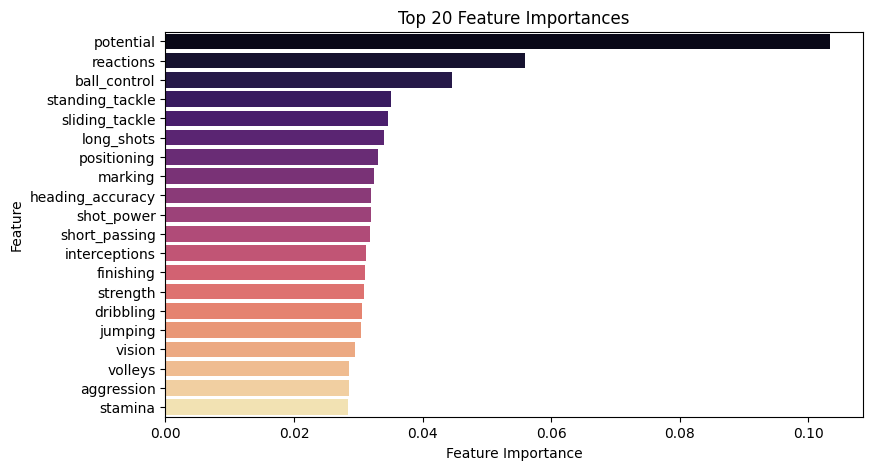

In [ ]:
feature_importance = random_forest.feature_importances_
# TO-DO: Get the top 10 and Create a DataFrame `feature_importance_df`
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Feature Importance': feature_importance
})
# TO-DO: Visualize the top 10 feature importance using a barplot
feature_importance_df = feature_importance_df.sort_values(by='Feature Importance', ascending=False).head(20)
# TO-DO: Analyze the top 10 features to determine if they make sense, and provide your reasoning
plt.figure(figsize = (9,5))

sns.barplot(data=feature_importance_df, palette='magma', y='Feature', x='Feature Importance')
plt.title('Top 20 Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')


Some of these attributes in feature importance make sense in terms of a player rating being high because of potential, reactions, ball control, etc being important for boh attackers and defenders.

In [ ]:
feature_importance_df

,Feature,Feature Importance
0,potential,0.103330
14,reactions,0.055985
10,ball_control,0.044602
27,standing_tackle,0.035115
28,sliding_tackle,0.034559
20,long_shots,0.034064
23,positioning,0.033109
26,marking,0.032377
3,heading_accuracy,0.032012
16,shot_power,0.031993


## 4.6 Trying fewer features

Let's try using fewer features in our logistic regression to see if we can get a better result
from the top 5 feature importances - potential, reaction, ball control, standing tackle, sliding tackle



In [ ]:
fewer_features = encoded_df[['potential','reactions','ball_control','standing_tackle','sliding_tackle']]

In [ ]:
fewer_features.reset_index(drop=True, inplace=True)


In [ ]:
fewer_features

,potential,reactions,ball_control,standing_tackle,sliding_tackle
0,69.0,69.0,71.0,69.0,69.0
1,70.0,70.0,11.0,9.0,17.0
2,63.0,63.0,68.0,54.0,52.0
3,70.0,71.0,78.0,35.0,21.0
4,71.0,59.0,78.0,34.0,30.0
...,...,...,...,...,...
9902,69.0,50.0,32.0,56.0,52.0
9903,66.0,48.0,44.0,61.0,65.0
9904,66.0,60.0,55.0,69.0,62.0
9905,68.0,48.0,42.0,69.0,68.0


In [ ]:
seed = 42

X_train_few, X_test_few, y_train_few, y_test_few = train_test_split(fewer_features,target,test_size = 0.2, random_state=seed)
Counter(y_test_few)

Counter({65.0: 128,
         73.0: 82,
         75.0: 79,
         61.0: 55,
         68.0: 115,
         78.0: 45,
         64.0: 109,
         63.0: 104,
         60.0: 44,
         66.0: 121,
         70.0: 127,
         57.0: 20,
         84.0: 5,
         62.0: 79,
         81.0: 10,
         74.0: 88,
         52.0: 8,
         77.0: 45,
         59.0: 37,
         72.0: 104,
         71.0: 98,
         69.0: 133,
         87.0: 2,
         83.0: 5,
         58.0: 32,
         67.0: 120,
         79.0: 28,
         56.0: 11,
         76.0: 65,
         80.0: 21,
         55.0: 15,
         53.0: 8,
         82.0: 15,
         85.0: 3,
         54.0: 13,
         94.0: 1,
         86.0: 3,
         51.0: 2,
         50.0: 1,
         88.0: 1})

In [ ]:
# TO-DO: Import required libraries
from sklearn.linear_model import LogisticRegression

# TO-DO: Initialize model with default parameters and fit it on the training set
regression = LogisticRegression()

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
regression.fit(X_train_few, y_train_few)

# TO-DO: Find the accuracy and store the value in `log_acc`
log_acc = regression.score(X_test_few, y_test_few)
print("Logistical Accuracy: ", log_acc)

Logistical Accuracy:  0.050454086781029264


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Seems like the logistical accuracy is still quite low at 5% even after we used fewer features - maybe this is an issue where the model is too simple to capture the complex patterns in data?

## 4.7 PCA to reduce dimensionality

Initial PCA: As a first step, we instantiate the PCA class from scikit-learn and fit it on our training set. We are not reducing the dimensionality of our data in this step but rather trying to find what would be the ideal number of Principal Components to choose. So keep all Principal Components for this step

In [ ]:
# TO-DO: Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit scaler on the x train data, then transform
X_train_scaled = scaler.fit_transform(X_train)

# initialize pca
pca = PCA()


pca.fit(X_train_scaled)

PCA()

Create an array of explained variance ratios and store it into a variable called explained_variance_ratios. Also, calculate the cumulative explained variance ratios and store that into another variable called cum_evr.

In [ ]:
# TO-DO: Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_

# TO-DO: Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(explained_variance_ratios)

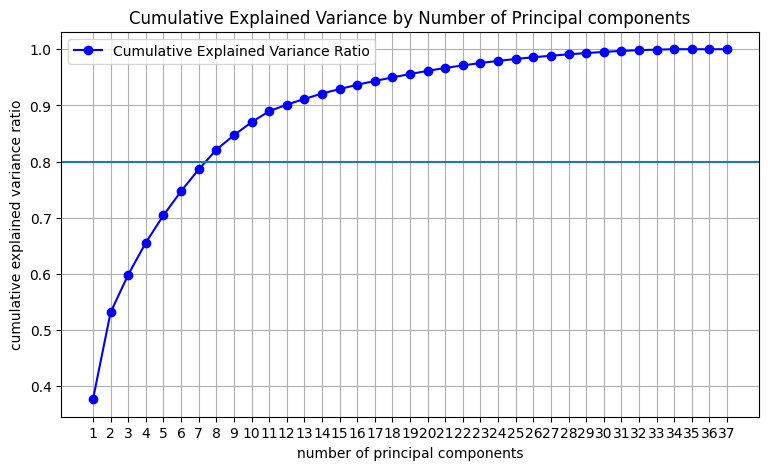

In [ ]:
# TO-DO: find optimal num components to use (n) by plotting explained variance ratio (2 points)
plt.figure(figsize=(9,5))

plt.plot(range(1, len(cum_evr)+1),cum_evr, marker='o',color='b', label = 'Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Number of Principal components')

plt.ylabel('cumulative explained variance ratio')
plt.xlabel('number of principal components')

# to make x-axis start at 1 for number of components
plt.xticks(range(1,len(cum_evr)+1))

plt.legend()

plt.axhline(y = 0.80, label = '80% variance threshold')
plt.grid(True)
plt.show()

Final PCA

Using our results above to help us decide the number of components to keep, choose a number (n) that explains at least 80% of total variance (i.e. strictly larger than 80%!) in the dataset. Then we re-fit and transformed PCA on the training set using the number of components we decided.

Our PCA should be trained on the training set (X_train) but only transformed on the test set (X_test).

In [ ]:
# based on the above values, i Should choose 18 since it's past 0.8

# np.argmax returns index where variance exceeds 0.80, which is 18 - and then add 1 because indices are 0 based, i just tried setting it to 18 but it won't work

correct_n = np.argmax(cum_evr > 0.80) + 1
pca_final = PCA(n_components=correct_n)



# 2. Transform on Testing Set and store it as `X_test_pca`
X_train_pca = pca_final.fit_transform(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test_pca = pca_final.transform(X_test_scaled)

In [ ]:
print("x test pca:", X_test_pca)

x test pca: [[-0.98550668 -1.72326282  2.46102782 ...  1.23267947  0.6947332
  -1.46182877]
 [-1.95242769  3.93446311  1.11038161 ... -1.64748525  2.00018962
   0.01845093]
 [ 3.82269289 -1.46526648  3.58511533 ...  3.4846215  -0.0407498
   0.34720666]
 ...
 [ 2.08081625  0.36586075 -0.48543832 ... -0.15712677  0.07619338
  -0.50192328]
 [-8.45990273 -2.15855732 -0.0296553  ... -0.0691561  -0.43058712
   0.22323662]
 [ 2.1163254   3.0928296   1.0223408  ... -1.88205405  1.44424083
   1.48240099]]


## 4.8 Logistic Regression with PCA
Fit the logistic regression on your Final Principal Components data using your optimal n.
Name the model log_reg_pca
Make predictions on the test set and store this as y_pred.
Report accuracy for the test set and call it test_accuracy

In [ ]:
# TO-DO: Initialize `log_reg_pca` model with default parameters and fit it on the PCA transformed training set
from sklearn.metrics import accuracy_score
log_reg_pca = LogisticRegression(random_state = 42)
log_reg_pca.fit(X_train_pca, y_train)

# TO-DO: Use the model to predict on the PCA transformed test set and save these predictions as `y_pred`
y_pred = log_reg_pca.predict(X_test_pca)

# TO-DO: Find the accuracy and store the value in `test_accuracy`
test_accuracy = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Test Accuracy: ",test_accuracy)

Test Accuracy:  0.14127144298688193


Accuracy here is a little bit better after PCA with 14.1%

## 4.9 Grid Search
As an extra exercise (and additional exploration outside of lecture material), let's see if we can use grid search to improve some of our modeling. Let's try this on a random forest classifier. We had to simplify our grid search parameters because the notebook was taking too long to run with the commented out params (10+ hrs)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    # these params were taking too long
    # 'n_estimators': [100, 200, 300],
    # 'max_depth': [10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'class_weight': ['balanced', None]
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 4],
    'class_weight': ['balanced']
}

# Initialize GridSearchCV
# cv - number of cross-validation folds, increasing it improves reliability but increases runtime
# scoring defines the evaluation metric
# n_jobs parallelizes the search (-1) for all availalbe processors
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    # reduced this from 5 to 3
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.47823348556502815
Test Accuracy: 0.5050454086781029


Grid search has improved our test accuracy to be 0.494 with the best score being 0.495.

## 4.10 Linear Regression


Let's try linear regression now.

#### 4.10.1 Split Data

In [ ]:
# TO-DO: Import required libraries
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# TO-DO: Initialize model with default parameters and fit it on the training set
reg = LinearRegression()

reg.fit(X_train, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg.predict(X_test)

# TO-DO: Find the R-squared score and store the value in `lin_reg_score`
lin_reg_score = r2_score(y_test,y_pred)

In [ ]:
print("Linear Regression Score: ", lin_reg_score)
print("Regular Coefficient: ",reg.coef_)
print("Regular Intercept",reg.intercept_)

Linear Regression Score:  0.8452351999663317
Regular Coefficient:  [ 5.65347680e-01  3.38107923e-02 -1.23876092e-03 -1.31692038e-02
 -1.40563504e-02  1.47928256e-02 -4.77287873e-02  1.77491302e-02
 -3.98427516e-04  2.57535133e-02  2.13966268e-02 -2.62023492e-02
 -2.56094769e-03  1.69362885e-02  2.88085560e-01 -1.72728491e-02
  9.39795633e-03  2.94042683e-02 -5.78928425e-03  5.86872547e-02
 -8.81158503e-04  1.33538730e-02  1.76205040e-02 -3.13069065e-02
  2.34979053e-02  6.42309351e-03  8.72213697e-03 -2.45431875e-02
 -1.43808510e-02  3.28923262e-02  2.45752187e-01 -2.78644513e-01
 -7.11571279e-02  3.23105150e-01 -2.51948022e-01  2.05495410e-02
 -2.05495410e-02]
Regular Intercept 3.3260094604181205


Linear regression seems to have a much better result at 84.5% accuracy

## 4.11 Ridge Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

# TO-DO: Intermediate step to address scale-invariance
scaler = StandardScaler()

# fit scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# transform test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# TO-DO: Import required libraries
from sklearn.linear_model import Ridge

# TO-DO: Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
ridge=Ridge(alpha=10)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
ridge.fit(X_train_scaled, y_train)
reg_ridge = ridge
y_pred = ridge.predict(X_test_scaled)
# TO-DO: Find the R-squared score and store the value in `ridge_score`
ridge_score = r2_score(y_test, y_pred)

In [ ]:
print("ridge_score: ",ridge_score)

ridge_score:  0.8452742778581704


Ridge regression here seems to be 84.5% which is more accurate.

## 4.12 Random Forest Regression

In [ ]:
# TO-DO: Import required libraries
from sklearn.ensemble import RandomForestRegressor

# TO-DO: Initialize model with default parameters and fit it on the training set
reg_rf = RandomForestRegressor(random_state = 42)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
# TO-DO: Find the R-squared score and store the value in `rfr_score`
rfr_score = r2_score(y_test, y_pred)

In [ ]:
print("rfr_score: ",rfr_score)

rfr_score:  0.9419542773838968


Random forest regression here is 94.2%

## 4.13 K Means Clustering

In [ ]:
features = encoded_df.drop(columns=['overall_rating'])

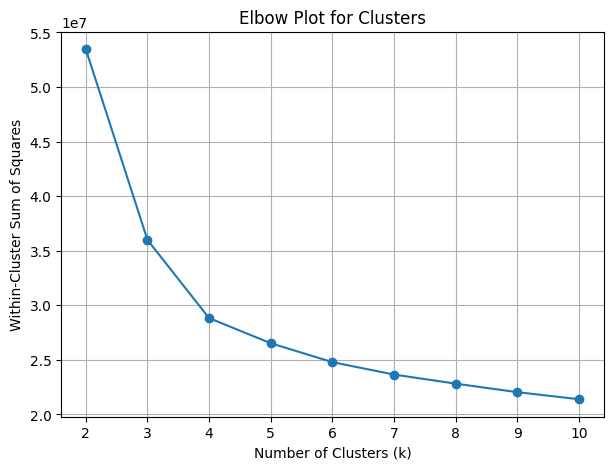

In [ ]:
# Import the necessary libraries
list_wcss = []
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

#   for k ranges from 2 to 10, fit on "features" to generate an elbow plot
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k, n_init = 5, random_state = 0)
  kmeans.fit(features)
  list_wcss.append(kmeans.inertia_)

plt.figure(figsize = (7,5))
plt.plot(range(2,11), list_wcss, marker = 'o')
plt.title('Elbow Plot for Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()

In [ ]:
number_of_cluster = 5 # - changes less after the above

# TO-DO: fill in the sum of squared distances for the best number of clusters
wcss_elbow = list_wcss[number_of_cluster-1]

In [ ]:
wcss_elbow

24787471.80796179

In [ ]:
list_wcss

[53466812.075717546,
 35992216.54859956,
 28823422.045594938,
 26522592.270858757,
 24787471.80796179,
 23650199.98718357,
 22818556.824283507,
 22036137.589841943,
 21390456.963655338]

# 5.0 Player Modeling By Position

## 5.1 Feature Engineering

Let's see if we can do any better in terms of our modeling and improve our ability to predict overall player rating if we separate players by position using the transfermarkets dataset. The player_attributes_df data set doesn't have any positions attached to it unfortunately - we can try some filtering based on thresholds for different attributes to essentially "create" positions, but first let's work with this dataset to see if we can do so.

In [ ]:
# below 3 lines have to do with using the transfr markets df
# most_recent_player_attributes_df = transfer_player_attributes_with_id.groupby('player_fifa_api_id')['date'].idxmax()
# # print(most_recent_player_attributes_df)
# deduped_df = transfer_player_attributes_with_id.loc[most_recent_player_attributes_df].reset_index(drop=True)

most_recent_player_attributes_df = new_players_positions_df.groupby('player_fifa_api_id')['date'].idxmax()
deduped_df = new_players_positions_df.loc[most_recent_player_attributes_df].reset_index(drop=True)

deduped_df = deduped_df.drop(columns=['gk_diving', 'gk_handling','gk_kicking','gk_positioning','gk_reflexes'])

# print(deduped_df)

In [ ]:
import pandas as pd


# Define categorization logic
def categorize_position(position):
    if pd.isnull(position):
        return 'Unknown'
    position = position.lower()  # Convert to lowercase for easier matching
    if any(keyword in position for keyword in ['striker', 'forward', 'attacking']):
        return 'Attacker'
    elif any(keyword in position for keyword in ['back', 'defender', 'goalkeeper']):
        return 'Defender'
    elif any(keyword in position for keyword in ['midfield', 'wing']):
        return 'Midfielder'
    else:
        return 'Unknown'

# Apply categorization
deduped_df['position'] = deduped_df['position'].apply(categorize_position)


In [ ]:
valid_work_rate_categories = ['high','medium','low']
deduped_df = deduped_df[deduped_df['defensive_work_rate'].isin(valid_work_rate_categories)]
deduped_df = deduped_df[deduped_df['attacking_work_rate'].isin(valid_work_rate_categories)]
deduped_df = deduped_df.drop(columns=['date', 'player_fifa_api_id', 'player_name', 'birthday'])
encoded_df = pd.get_dummies(deduped_df, columns=['attacking_work_rate', 'defensive_work_rate', 'preferred_foot'])

# Check the counts of each unique value in the 'positions' column
position_counts = encoded_df['position'].value_counts(dropna=False)

# Display the counts
print(position_counts)
# valid_work_rate_categories = ['high','medium','low']
# deduped_df = deduped_df[deduped_df['defensive_work_rate'].isin(valid_work_rate_categories)]
# deduped_df = deduped_df[deduped_df['attacking_work_rate'].isin(valid_work_rate_categories)]

position
Defender      3469
Midfielder    2351
Attacker      2061
Unknown       2025
Name: count, dtype: int64


The positions are all over the place probably because they're just imported from wikipedia - how can we clean this data - seems like there's Midfielder, Striker, Goalkeeper, Forward, etc. Let's classify everyone into Attacker, Defender, Midfielder as previously.

In [ ]:
encoded_df = encoded_df[~encoded_df['position'].isin([None, 'Unknown'])]
encoded_df_position = encoded_df

## 5.2 Preprocessing - Create Features and Labels

In [ ]:
# see all the columns
encoded_df.columns

Index(['Unnamed: 0', 'id_x', 'player_api_id', 'height', 'weight', 'position',
       'id_y', 'overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'attacking_work_rate_high',
       'attacking_work_rate_low', 'attacking_work_rate_medium',
       'defensive_work_rate_high', 'defensive_work_rate_low',
       'defensive_work_rate_medium', 'preferred_foot_left',
       'preferred_foot_right'],
      dtype='object')

We consider both categorical and numerical values - categorical is in work rates for attackers and defenders and preferred foot.

In [ ]:
# encoded_df_categorical = encoded_df.select_dtypes(include=['object'])
# below is for the old transfr markets join
# encoded_df = encoded_df.drop(columns=['id_x','id_y','last_season','current_club_id'])
# encoded_df = encoded_df.drop(columns=['id_x','id_y'])

# Add the 'position' column to the dataframe, if it exists
# encoded_df = encoded_df.drop(columns=['market_value_in_eur','highest_market_value_in_eur','player_id'])
# if 'position' in encoded_df_position.columns:
#     encoded_df['position'] = encoded_df_position['position']

In [ ]:
encoded_df['position'].unique()


array(['Defender', 'Midfielder', 'Attacker'], dtype=object)

In [ ]:
encoded_df['position'].value_counts()

,count
position,
Defender,3469
Midfielder,2351
Attacker,2061


Let's filter by all positions except goalkeeper for now - we have actually dropped the goalkeepers stats from previously.

In [ ]:
filtered_attack = encoded_df[encoded_df['position'].isin(['Attacker'])].drop(columns=['position']).dropna()
filtered_defender = encoded_df[encoded_df['position'].isin(['Defender'])].drop(columns=['position']).dropna()
filtered_midfield = encoded_df[encoded_df['position'].isin(['Midfielder'])].drop(columns=['position']).dropna()
# encoded_df = encoded_df.select_dtypes(include=['number'])
# encoded_df = encoded_df.drop(columns=['id_x','id_y','last_season','current_club_id'])

In [ ]:
filtered_attack

,Unnamed: 0,id_x,player_api_id,height,weight,id_y,overall_rating,potential,crossing,finishing,...,standing_tackle,sliding_tackle,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,preferred_foot_left,preferred_foot_right
4,5028,5034,30630,175.26,161,83323,71.0,71.0,80.0,64.0,...,34.0,30.0,False,False,True,False,True,False,False,True
22,7863,7875,23025,170.18,157,131615,61.0,61.0,65.0,57.0,...,53.0,41.0,False,False,True,False,False,True,False,True
23,9000,9014,24635,175.26,161,150090,80.0,80.0,68.0,85.0,...,26.0,17.0,True,False,False,False,True,False,False,True
25,2269,2272,30340,170.18,170,38031,69.0,69.0,69.0,73.0,...,26.0,24.0,False,False,True,False,True,False,False,True
28,3574,3578,33989,193.04,181,59719,76.0,76.0,60.0,77.0,...,56.0,42.0,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11030,8201,8213,432418,187.96,176,137194,56.0,58.0,23.0,58.0,...,20.0,25.0,False,False,True,False,False,True,False,True
11033,2948,2952,188529,182.88,183,49174,57.0,63.0,33.0,60.0,...,13.0,21.0,True,False,False,False,False,True,False,True
11041,2568,2571,725718,193.04,165,43018,60.0,75.0,23.0,58.0,...,18.0,23.0,False,False,True,False,False,True,False,True
11042,1616,1619,726956,185.42,176,26862,54.0,68.0,30.0,61.0,...,18.0,14.0,False,False,True,False,False,True,False,True


In [ ]:
filtered_defender

,Unnamed: 0,id_x,player_api_id,height,weight,id_y,overall_rating,potential,crossing,finishing,...,standing_tackle,sliding_tackle,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,preferred_foot_left,preferred_foot_right
0,3875,3879,39357,182.88,181,64695,69.0,69.0,75.0,50.0,...,69.0,69.0,False,False,True,True,False,False,True,False
1,400,401,41762,187.96,183,6770,70.0,70.0,12.0,12.0,...,9.0,17.0,False,False,True,False,False,True,False,True
5,6520,6530,101983,182.88,165,108607,73.0,73.0,25.0,13.0,...,13.0,14.0,False,False,True,False,False,True,True,False
7,4077,4081,30668,187.96,194,68043,68.0,68.0,65.0,22.0,...,73.0,68.0,False,False,True,False,False,True,False,True
26,5203,5210,32574,187.96,190,86443,73.0,73.0,62.0,31.0,...,76.0,73.0,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11043,8649,8663,255538,187.96,170,144337,55.0,56.0,32.0,21.0,...,64.0,61.0,False,False,True,False,False,True,False,True
11046,1813,1816,728125,177.80,161,30343,50.0,69.0,36.0,31.0,...,59.0,57.0,False,False,True,False,False,True,True,False
11051,6160,6167,733787,175.26,152,102370,51.0,67.0,51.0,30.0,...,53.0,53.0,False,False,True,False,False,True,True,False
11057,3484,3488,746419,175.26,152,58305,59.0,66.0,55.0,28.0,...,69.0,62.0,True,False,False,False,False,True,False,True


In [ ]:
filtered_midfield

,Unnamed: 0,id_x,player_api_id,height,weight,id_y,overall_rating,potential,crossing,finishing,...,standing_tackle,sliding_tackle,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,preferred_foot_left,preferred_foot_right
2,9165,9179,26028,182.88,165,152808,63.0,63.0,59.0,49.0,...,54.0,52.0,False,False,True,True,False,False,False,True
6,739,742,30955,170.18,150,12774,88.0,88.0,79.0,73.0,...,57.0,56.0,True,False,False,False,False,True,False,True
8,2396,2399,38243,172.72,163,40179,66.0,70.0,61.0,53.0,...,26.0,31.0,False,False,True,False,False,True,False,True
9,3012,3016,24217,170.18,159,50294,74.0,74.0,78.0,68.0,...,66.0,65.0,False,False,True,False,False,True,True,False
11,3801,3805,27731,180.34,161,63516,73.0,73.0,71.0,59.0,...,73.0,69.0,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11045,8537,8551,265944,180.34,163,142478,59.0,66.0,46.0,45.0,...,58.0,52.0,False,False,True,False,False,True,False,True
11049,7485,7496,690308,177.80,159,125366,59.0,69.0,51.0,27.0,...,68.0,61.0,False,False,True,False,False,True,False,True
11050,8027,8039,692973,182.88,154,134407,60.0,73.0,61.0,61.0,...,26.0,24.0,False,False,True,False,False,True,False,True
11052,232,233,715642,182.88,161,3921,59.0,65.0,54.0,28.0,...,64.0,63.0,False,False,True,False,False,True,False,True


In [ ]:
features_attack = filtered_attack.drop(columns=['overall_rating','Unnamed: 0', 'id_x','id_y'])
features_defender = filtered_defender.drop(columns=['overall_rating','Unnamed: 0', 'id_x','id_y'])
features_midfield = filtered_midfield.drop(columns=['overall_rating','Unnamed: 0', 'id_x','id_y'])
target_attack = filtered_attack['overall_rating']
target_defend = filtered_defender['overall_rating']
target_midfield = filtered_midfield['overall_rating']

In [ ]:
features_attack

,player_api_id,height,weight,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,standing_tackle,sliding_tackle,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,preferred_foot_left,preferred_foot_right
4,30630,175.26,161,71.0,80.0,64.0,41.0,77.0,75.0,79.0,...,34.0,30.0,False,False,True,False,True,False,False,True
22,23025,170.18,157,61.0,65.0,57.0,51.0,68.0,69.0,63.0,...,53.0,41.0,False,False,True,False,False,True,False,True
23,24635,175.26,161,80.0,68.0,85.0,63.0,81.0,84.0,82.0,...,26.0,17.0,True,False,False,False,True,False,False,True
25,30340,170.18,170,69.0,69.0,73.0,62.0,54.0,73.0,72.0,...,26.0,24.0,False,False,True,False,True,False,False,True
28,33989,193.04,181,76.0,60.0,77.0,85.0,83.0,76.0,81.0,...,56.0,42.0,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11030,432418,187.96,176,58.0,23.0,58.0,68.0,56.0,57.0,50.0,...,20.0,25.0,False,False,True,False,False,True,False,True
11033,188529,182.88,183,63.0,33.0,60.0,50.0,55.0,59.0,66.0,...,13.0,21.0,True,False,False,False,False,True,False,True
11041,725718,193.04,165,75.0,23.0,58.0,70.0,60.0,63.0,48.0,...,18.0,23.0,False,False,True,False,False,True,False,True
11042,726956,185.42,176,68.0,30.0,61.0,61.0,39.0,38.0,50.0,...,18.0,14.0,False,False,True,False,False,True,False,True


In [ ]:

subset_features_attack = filtered_attack[[ 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle']]

In [ ]:
subset_features_attack['sum'] = subset_features.sum(axis=1)

<ipython-input-140-ac08a5faa094>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_features_attack['sum'] = subset_features.sum(axis=1)


In [ ]:
subset_features_attack['sum']

,sum
4,3580.0
22,3370.0
23,4000.0
25,3588.0
28,3834.0
...,...
11030,3284.0
11033,2654.0
11041,2460.0
11042,1158.0


In [ ]:
correlation_attack = subset_features_attack['sum'].corr(filtered_attack['overall_rating'])

print(f"Correlation coefficient: {correlation_attack}")

Correlation coefficient: 0.46657275221354444


## 5.3 Logistic Regression by Position

Now let's do logistic regression by position to see if we can get a better result.

In [ ]:
seed = 42

# Splitting for Attack group
X_train_attack, X_test_attack, y_train_attack, y_test_attack = train_test_split(
    features_attack, target_attack, test_size=0.2, random_state=seed
)

# Splitting for Defender group
X_train_defender, X_test_defender, y_train_defender, y_test_defender = train_test_split(
    features_defender, target_defend, test_size=0.2, random_state=seed
)

# Splitting for Midfield group
X_train_midfield, X_test_midfield, y_train_midfield, y_test_midfield = train_test_split(
    features_midfield, target_midfield, test_size=0.2, random_state=seed
)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
regression = LogisticRegression()

# Attack dataset
regression.fit(X_train_attack, y_train_attack)
y_pred_attack = regression.predict(X_test_attack)
log_acc_attack = regression.score(X_test_attack, y_test_attack)

# Defender dataset
regression.fit(X_train_defender, y_train_defender)
y_pred_defender = regression.predict(X_test_defender)
log_acc_defender = regression.score(X_test_defender, y_test_defender)

# Midfield dataset
regression.fit(X_train_midfield, y_train_midfield)
y_pred_midfield = regression.predict(X_test_midfield)
log_acc_midfield = regression.score(X_test_midfield, y_test_midfield)

# Print the accuracy for each dataset
print(f"Logistic Regression Accuracy (Attack): ", log_acc_attack)
print(f"Logistic Regression Accuracy (Defender): ", log_acc_defender)
print(f"Logistic Regression Accuracy (Midfield): ",log_acc_midfield)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy (Attack):  0.06053268765133172
Logistic Regression Accuracy (Defender):  0.053314121037463975
Logistic Regression Accuracy (Midfield):  0.07006369426751592


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression still terrible for each position - but why?


*   Logistic Regression Accuracy (Attack): 0.0536

*   Logistic Regression Accuracy (Defender): 0.0833

*   Logistic Regression Accuracy (Midfield): 0.0804



## 5.4 Random Forest Classifier

Let's try random forest now

In [ ]:
# Import required libraries
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with desired parameters
random_forest = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=120,
    max_depth=30,
    random_state=42
)

# --- Attack Group ---
# Fit the model on the training set for the attack group
random_forest.fit(X_train_attack, y_train_attack)

# Predict on the test set and calculate accuracy
attack_acc = random_forest.score(X_test_attack, y_test_attack)
attack_predictions = random_forest.predict(X_test_attack)

# Compute the confusion matrix for the attack group
attack_confusion = confusion_matrix(y_test_attack, attack_predictions)

# --- Defender Group ---
# Fit the model on the training set for the defender group
random_forest.fit(X_train_defender, y_train_defender)

# Predict on the test set and calculate accuracy
defender_acc = random_forest.score(X_test_defender, y_test_defender)
defender_predictions = random_forest.predict(X_test_defender)

# Compute the confusion matrix for the defender group
defender_confusion = confusion_matrix(y_test_defender, defender_predictions)

# --- Midfield Group ---
# Fit the model on the training set for the midfield group
random_forest.fit(X_train_midfield, y_train_midfield)

# Predict on the test set and calculate accuracy
midfield_acc = random_forest.score(X_test_midfield, y_test_midfield)
midfield_predictions = random_forest.predict(X_test_midfield)

# Compute the confusion matrix for the midfield group
midfield_confusion = confusion_matrix(y_test_midfield, midfield_predictions)

# Display results for each group
print("Attack Group - Accuracy:", attack_acc)
print("Attack Group - Confusion Matrix:\n", attack_confusion)

print("\nDefender Group - Accuracy:", defender_acc)
print("Defender Group - Confusion Matrix:\n", defender_confusion)

print("\nMidfield Group - Accuracy:", midfield_acc)
print("Midfield Group - Confusion Matrix:\n", midfield_confusion)


Attack Group - Accuracy: 0.41646489104116224
Attack Group - Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Defender Group - Accuracy: 0.43515850144092216
Defender Group - Confusion Matrix:
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 2]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 2 1]]

Midfield Group - Accuracy: 0.40976645435244163
Midfield Group - Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 5.5 Plot Feature Importances

<ipython-input-146-ae9a6e4438f6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df_attack, palette='magma', y='Feature', x='Feature Importance')


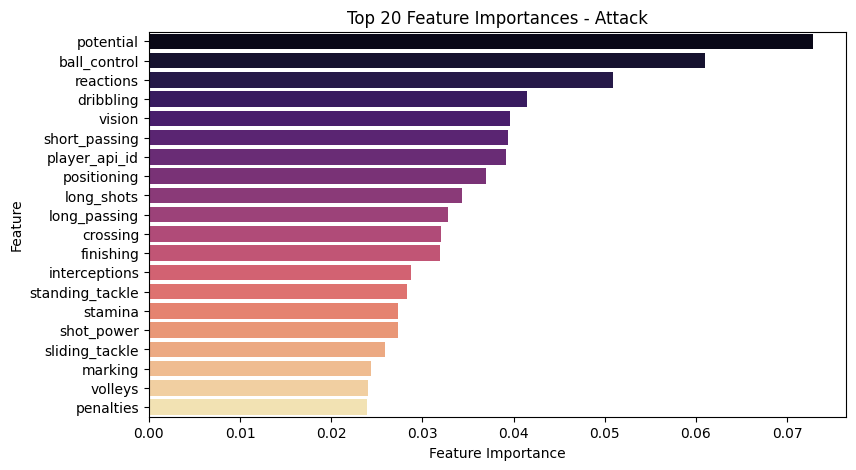

<ipython-input-146-ae9a6e4438f6>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df_defender, palette='magma', y='Feature', x='Feature Importance')


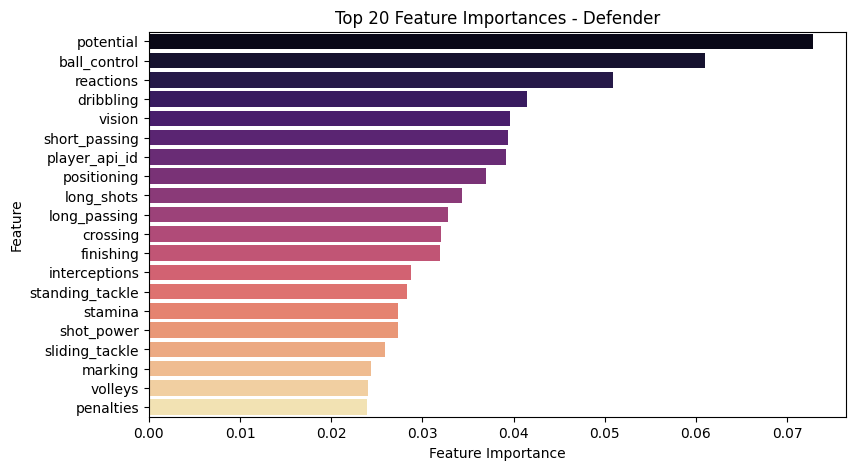

<ipython-input-146-ae9a6e4438f6>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df_midfield, palette='magma', y='Feature', x='Feature Importance')


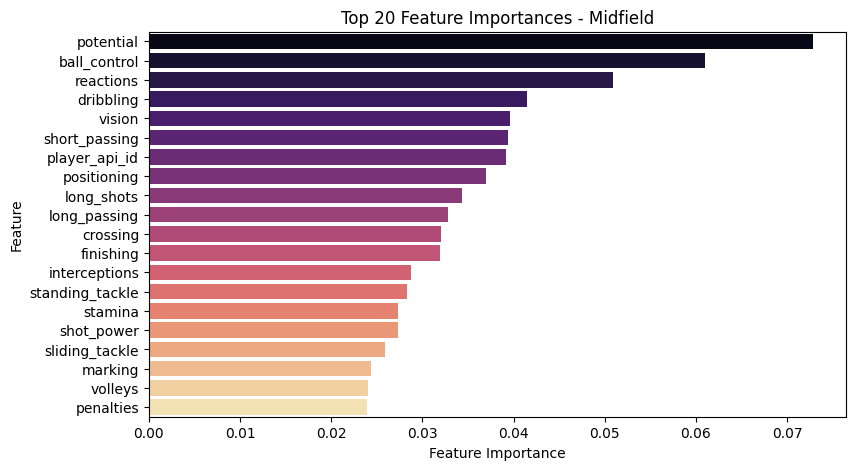

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Attack Group Feature Importance ---
# Get feature importances for the attack group
feature_importance_attack = random_forest.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df_attack = pd.DataFrame({
    'Feature': X_train_attack.columns,
    'Feature Importance': feature_importance_attack
})

# Sort and get the top 20 features
feature_importance_df_attack = feature_importance_df_attack.sort_values(by='Feature Importance', ascending=False).head(20)

# Visualize the top 20 feature importances for the attack group
plt.figure(figsize = (9,5))
sns.barplot(data=feature_importance_df_attack, palette='magma', y='Feature', x='Feature Importance')
plt.title('Top 20 Feature Importances - Attack')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# --- Defender Group Feature Importance ---
# Get feature importances for the defender group
feature_importance_defender = random_forest.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df_defender = pd.DataFrame({
    'Feature': X_train_defender.columns,
    'Feature Importance': feature_importance_defender
})

# Sort and get the top 20 features
feature_importance_df_defender = feature_importance_df_defender.sort_values(by='Feature Importance', ascending=False).head(20)

# Visualize the top 20 feature importances for the defender group
plt.figure(figsize = (9,5))
sns.barplot(data=feature_importance_df_defender, palette='magma', y='Feature', x='Feature Importance')
plt.title('Top 20 Feature Importances - Defender')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# --- Midfield Group Feature Importance ---
# Get feature importances for the midfield group
feature_importance_midfield = random_forest.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df_midfield = pd.DataFrame({
    'Feature': X_train_midfield.columns,
    'Feature Importance': feature_importance_midfield
})

# Sort and get the top 20 features
feature_importance_df_midfield = feature_importance_df_midfield.sort_values(by='Feature Importance', ascending=False).head(20)

# Visualize the top 20 feature importances for the midfield group
plt.figure(figsize = (9,5))
sns.barplot(data=feature_importance_df_midfield, palette='magma', y='Feature', x='Feature Importance')
plt.title('Top 20 Feature Importances - Midfield')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
feature_importance_attack

array([0.03918248, 0.01412313, 0.01993083, 0.07287863, 0.03203272,
       0.03198936, 0.022107  , 0.03934169, 0.02407994, 0.04147152,
       0.02366236, 0.02275498, 0.03283813, 0.06104535, 0.01953972,
       0.02110393, 0.0230408 , 0.05087979, 0.02258418, 0.02734735,
       0.02194357, 0.0273589 , 0.02150268, 0.03431404, 0.02333909,
       0.02872326, 0.03695395, 0.03957138, 0.02394992, 0.02440766,
       0.02826161, 0.02584812, 0.00262911, 0.00090737, 0.00383502,
       0.00282779, 0.00145415, 0.00346557, 0.00329064, 0.00348226])

In [ ]:
feature_importance_defender

array([0.03918248, 0.01412313, 0.01993083, 0.07287863, 0.03203272,
       0.03198936, 0.022107  , 0.03934169, 0.02407994, 0.04147152,
       0.02366236, 0.02275498, 0.03283813, 0.06104535, 0.01953972,
       0.02110393, 0.0230408 , 0.05087979, 0.02258418, 0.02734735,
       0.02194357, 0.0273589 , 0.02150268, 0.03431404, 0.02333909,
       0.02872326, 0.03695395, 0.03957138, 0.02394992, 0.02440766,
       0.02826161, 0.02584812, 0.00262911, 0.00090737, 0.00383502,
       0.00282779, 0.00145415, 0.00346557, 0.00329064, 0.00348226])

In [ ]:
feature_importance_midfield

array([0.03918248, 0.01412313, 0.01993083, 0.07287863, 0.03203272,
       0.03198936, 0.022107  , 0.03934169, 0.02407994, 0.04147152,
       0.02366236, 0.02275498, 0.03283813, 0.06104535, 0.01953972,
       0.02110393, 0.0230408 , 0.05087979, 0.02258418, 0.02734735,
       0.02194357, 0.0273589 , 0.02150268, 0.03431404, 0.02333909,
       0.02872326, 0.03695395, 0.03957138, 0.02394992, 0.02440766,
       0.02826161, 0.02584812, 0.00262911, 0.00090737, 0.00383502,
       0.00282779, 0.00145415, 0.00346557, 0.00329064, 0.00348226])

## 5.6 PCA to reduce dimensionality

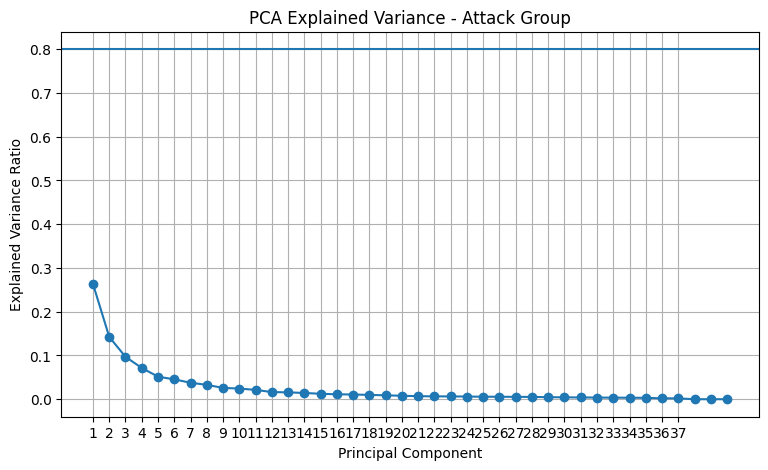

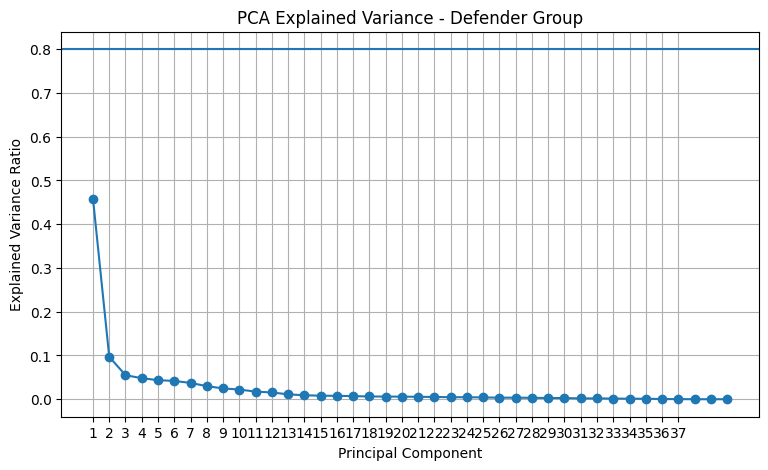

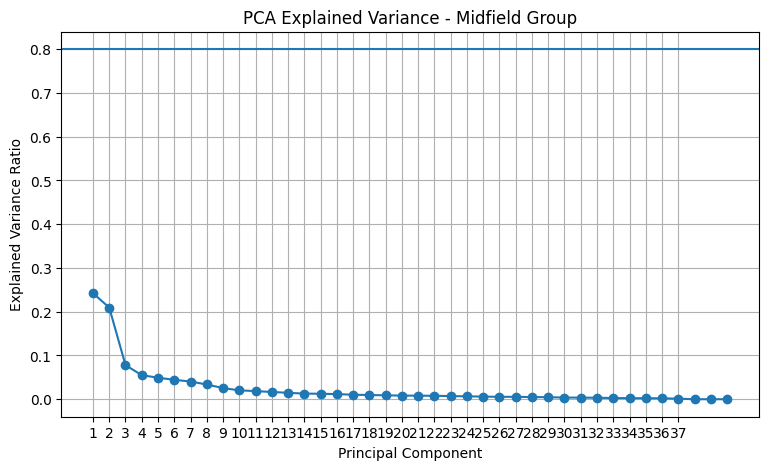

In [ ]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Initialize the scaler
scaler = StandardScaler()

# --- Attack Group PCA ---
# Scale the X_train data for the attack group
X_train_scaled_attack = scaler.fit_transform(X_train_attack)

# Initialize PCA and fit to scaled attack group data
pca_attack = PCA()
pca_attack.fit(X_train_scaled_attack)

# Save the explained variance ratios for the attack group
explained_variance_ratios_attack = pca_attack.explained_variance_ratio_

# Calculate cumulative explained variance ratio for the attack group
cum_evr_attack = np.cumsum(explained_variance_ratios_attack)

# Plot explained variance ratio for the attack group
plt.figure(figsize=(9, 5))
plt.plot(range(1, len(cum_evr_attack) + 1), pca_attack.explained_variance_ratio_, marker='o')
plt.title('PCA Explained Variance - Attack Group')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
# to make x-axis start at 1 for number of components
plt.xticks(range(1,len(cum_evr)+1))
plt.axhline(y = 0.80, label = '80% variance threshold')
plt.grid(True)
plt.show()

# --- Defender Group PCA ---
# Scale the X_train data for the defender group
X_train_scaled_defender = scaler.fit_transform(X_train_defender)

# Initialize PCA and fit to scaled defender group data
pca_defender = PCA()
pca_defender.fit(X_train_scaled_defender)

# Save the explained variance ratios for the defender group
explained_variance_ratios_defender = pca_defender.explained_variance_ratio_

# Calculate cumulative explained variance ratio for the defender group
cum_evr_defender = np.cumsum(explained_variance_ratios_defender)

# Plot explained variance ratio for the defender group
plt.figure(figsize=(9, 5))
plt.plot(range(1, len(cum_evr_defender) + 1), pca_defender.explained_variance_ratio_, marker='o')
plt.title('PCA Explained Variance - Defender Group')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
# to make x-axis start at 1 for number of components
plt.xticks(range(1,len(cum_evr)+1))
plt.axhline(y = 0.80, label = '80% variance threshold')
plt.grid(True)
plt.show()

# --- Midfield Group PCA ---
# Scale the X_train data for the midfield group
X_train_scaled_midfield = scaler.fit_transform(X_train_midfield)

# Initialize PCA and fit to scaled midfield group data
pca_midfield = PCA()
pca_midfield.fit(X_train_scaled_midfield)

# Save the explained variance ratios for the midfield group
explained_variance_ratios_midfield = pca_midfield.explained_variance_ratio_

# Calculate cumulative explained variance ratio for the midfield group
cum_evr_midfield = np.cumsum(explained_variance_ratios_midfield)

# Plot explained variance ratio for the midfield group
plt.figure(figsize=(9, 5))
plt.plot(range(1, len(cum_evr_midfield) + 1), pca_midfield.explained_variance_ratio_, marker='o')
plt.title('PCA Explained Variance - Midfield Group')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
# to make x-axis start at 1 for number of components
plt.xticks(range(1,len(cum_evr)+1))
plt.axhline(y = 0.80, label = '80% variance threshold')
plt.grid(True)
plt.show()



## 5.7 Final PCA

Choose a number that explains at least 80% of total variance (larger than 80%!) in this dataset.

In [ ]:
# --- Attack Group PCA (Final Step) ---
# Find the optimal number of components for attack group where cumulative explained variance exceeds 80%
correct_n_attack = np.argmax(cum_evr_attack > 0.80) + 1
pca_final_attack = PCA(n_components=correct_n_attack)

# Transform the attack group's training data
X_train_pca_attack = pca_final_attack.fit_transform(X_train_scaled_attack)

# Transform the attack group's testing data
X_test_scaled_attack = scaler.transform(X_test_attack)
X_test_pca_attack = pca_final_attack.transform(X_test_scaled_attack)


# --- Defender Group PCA (Final Step) ---
# Find the optimal number of components for defender group where cumulative explained variance exceeds 80%
correct_n_defender = np.argmax(cum_evr_defender > 0.80) + 1
pca_final_defender = PCA(n_components=correct_n_defender)

# Transform the defender group's training data
X_train_pca_defender = pca_final_defender.fit_transform(X_train_scaled_defender)

# Transform the defender group's testing data
X_test_scaled_defender = scaler.transform(X_test_defender)
X_test_pca_defender = pca_final_defender.transform(X_test_scaled_defender)


# --- Midfield Group PCA (Final Step) ---
# Find the optimal number of components for midfield group where cumulative explained variance exceeds 80%
correct_n_midfield = np.argmax(cum_evr_midfield > 0.80) + 1
pca_final_midfield = PCA(n_components=correct_n_midfield)

# Transform the midfield group's training data
X_train_pca_midfield = pca_final_midfield.fit_transform(X_train_scaled_midfield)

# Transform the midfield group's testing data
X_test_scaled_midfield = scaler.transform(X_test_midfield)
X_test_pca_midfield = pca_final_midfield.transform(X_test_scaled_midfield)


In [ ]:
# --- Attack Group PCA ---
print("X_test_pca_attack:")
print(X_test_pca_attack)

# --- Defender Group PCA ---
print("X_test_pca_defender:")
print(X_test_pca_defender)

# --- Midfield Group PCA ---
print("X_test_pca_midfield:")
print(X_test_pca_midfield)


X_test_pca_attack:
[[-6.14601131  4.20474638 -0.68940998 ... -1.25795118 -0.23947259
  -1.30655953]
 [ 0.91125862  3.73791249 -2.28058364 ... -1.14738626 -1.56183493
  -0.34771645]
 [ 4.55386508 -1.91072706 -4.74698599 ...  0.44002552  0.48005539
   0.44408876]
 ...
 [-1.865537    8.0495566  -1.68063311 ...  0.09797213  0.05792875
  -0.5306048 ]
 [ 1.98376511 -1.57688867 -3.87280964 ...  0.07355727 -0.52432906
  -0.30631118]
 [-3.17593968  0.403855   -3.51369349 ... -0.25466799  0.40172051
  -1.03544819]]
X_test_pca_defender:
[[-16.26498421   0.84282493  -2.41743357 ...   3.10113283  -1.92395004
    0.39445932]
 [ -6.62556566   5.4509952    1.11325191 ...   0.29247923  -1.29383695
   -0.63746506]
 [ -0.39188591   0.75156059  -1.38208879 ...   1.28949194  -0.90128692
   -0.88545583]
 ...
 [ -5.3731587    4.79425942   0.58815423 ...   4.37317698  -1.54462691
   -2.09639312]
 [  0.56097818   0.88443332  -2.62163389 ...   2.95530939  -1.21464941
   -1.25174347]
 [ -2.35589715   4.23305042 

## 5.8 Linear Regression

### 5.8.1 Split Data

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# --- Attack Group Linear Regression ---
# Initialize the model
reg_attack = LinearRegression()

# Fit the model to the training data
reg_attack.fit(X_train_attack, y_train_attack)

# Predict on the test set
y_pred_attack = reg_attack.predict(X_test_attack)

# Calculate the R-squared score
lin_reg_score_attack = r2_score(y_test_attack, y_pred_attack)

print(f"Attack Group R-squared Score: {lin_reg_score_attack}")


# --- Defender Group Linear Regression ---
# Initialize the model
reg_defender = LinearRegression()

# Fit the model to the training data
reg_defender.fit(X_train_defender, y_train_defender)

# Predict on the test set
y_pred_defender = reg_defender.predict(X_test_defender)

# Calculate the R-squared score
lin_reg_score_defender = r2_score(y_test_defender, y_pred_defender)

print(f"Defender Group R-squared Score: {lin_reg_score_defender}")


# --- Midfield Group Linear Regression ---
# Initialize the model
reg_midfield = LinearRegression()

# Fit the model to the training data
reg_midfield.fit(X_train_midfield, y_train_midfield)

# Predict on the test set
y_pred_midfield = reg_midfield.predict(X_test_midfield)

# Calculate the R-squared score
lin_reg_score_midfield = r2_score(y_test_midfield, y_pred_midfield)

print(f"Midfield Group R-squared Score: {lin_reg_score_midfield}")


Attack Group R-squared Score: 0.9507892259555146
Defender Group R-squared Score: 0.9061522737566571
Midfield Group R-squared Score: 0.9304296045054454


## 5.8.2 Ridge Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# --- Attack Group Ridge Regression ---
# Initialize scaler and scale data
scaler_attack = StandardScaler()
X_train_attack_scaled = scaler_attack.fit_transform(X_train_attack)
X_test_attack_scaled = scaler_attack.transform(X_test_attack)

# Initialize Ridge model with alpha = 10
ridge_attack = Ridge(alpha=10)

# Fit the model and predict on test set
ridge_attack.fit(X_train_attack_scaled, y_train_attack)
y_pred_attack = ridge_attack.predict(X_test_attack_scaled)

# Calculate R-squared score
ridge_score_attack = r2_score(y_test_attack, y_pred_attack)
print(f"Attack Group Ridge R-squared Score: {ridge_score_attack}")


# --- Defender Group Ridge Regression ---
# Initialize scaler and scale data
scaler_defender = StandardScaler()
X_train_defender_scaled = scaler_defender.fit_transform(X_train_defender)
X_test_defender_scaled = scaler_defender.transform(X_test_defender)

# Initialize Ridge model with alpha = 10
ridge_defender = Ridge(alpha=10)

# Fit the model and predict on test set
ridge_defender.fit(X_train_defender_scaled, y_train_defender)
y_pred_defender = ridge_defender.predict(X_test_defender_scaled)

# Calculate R-squared score
ridge_score_defender = r2_score(y_test_defender, y_pred_defender)
print(f"Defender Group Ridge R-squared Score: {ridge_score_defender}")


# --- Midfield Group Ridge Regression ---
# Initialize scaler and scale data
scaler_midfield = StandardScaler()
X_train_midfield_scaled = scaler_midfield.fit_transform(X_train_midfield)
X_test_midfield_scaled = scaler_midfield.transform(X_test_midfield)

# Initialize Ridge model with alpha = 10
ridge_midfield = Ridge(alpha=10)

# Fit the model and predict on test set
ridge_midfield.fit(X_train_midfield_scaled, y_train_midfield)
y_pred_midfield = ridge_midfield.predict(X_test_midfield_scaled)

# Calculate R-squared score
ridge_score_midfield = r2_score(y_test_midfield, y_pred_midfield)
print(f"Midfield Group Ridge R-squared Score: {ridge_score_midfield}")


Attack Group Ridge R-squared Score: 0.9512447806261138
Defender Group Ridge R-squared Score: 0.9062381679919735
Midfield Group Ridge R-squared Score: 0.9305428217661998


## 5.8.3 Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# --- Attack Group Random Forest Regressor ---
# Initialize Random Forest Regressor
rf_attack = RandomForestRegressor(random_state=42)

# Fit the model on training set
rf_attack.fit(X_train_attack, y_train_attack)

# Predict on the test set
y_pred_attack_rf = rf_attack.predict(X_test_attack)

# Calculate R-squared score
rfr_score_attack = r2_score(y_test_attack, y_pred_attack_rf)
print(f"Attack Group Random Forest R-squared Score: {rfr_score_attack}")


# --- Defender Group Random Forest Regressor ---
# Initialize Random Forest Regressor
rf_defender = RandomForestRegressor(random_state=42)

# Fit the model on training set
rf_defender.fit(X_train_defender, y_train_defender)

# Predict on the test set
y_pred_defender_rf = rf_defender.predict(X_test_defender)

# Calculate R-squared score
rfr_score_defender = r2_score(y_test_defender, y_pred_defender_rf)
print(f"Defender Group Random Forest R-squared Score: {rfr_score_defender}")


# --- Midfield Group Random Forest Regressor ---
# Initialize Random Forest Regressor
rf_midfield = RandomForestRegressor(random_state=42)

# Fit the model on training set
rf_midfield.fit(X_train_midfield, y_train_midfield)

# Predict on the test set
y_pred_midfield_rf = rf_midfield.predict(X_test_midfield)

# Calculate R-squared score
rfr_score_midfield = r2_score(y_test_midfield, y_pred_midfield_rf)
print(f"Midfield Group Random Forest R-squared Score: {rfr_score_midfield}")


Attack Group Random Forest R-squared Score: 0.9544349995896958
Defender Group Random Forest R-squared Score: 0.9356380386238439
Midfield Group Random Forest R-squared Score: 0.9549505808185453


## 5.8.4 K Means Clustering

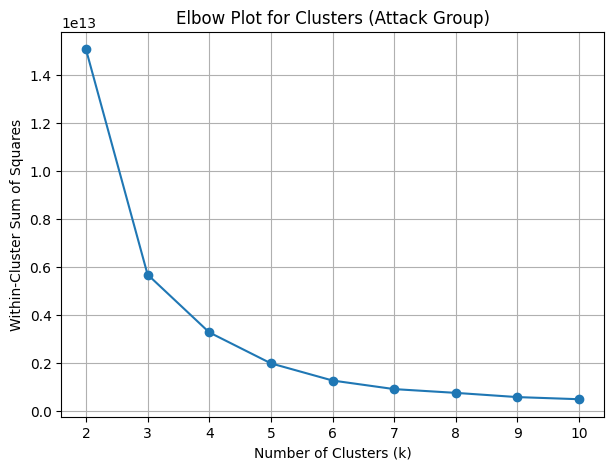

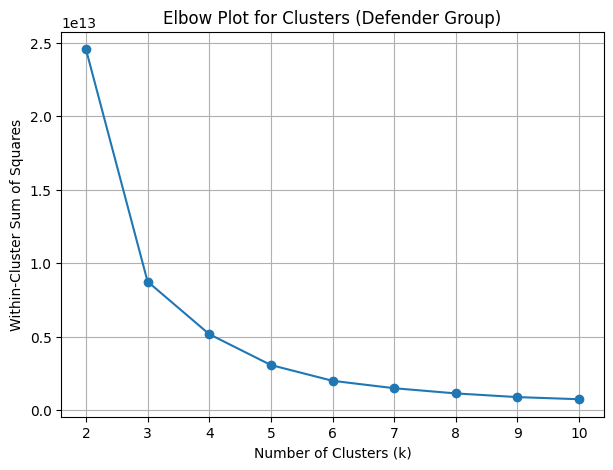

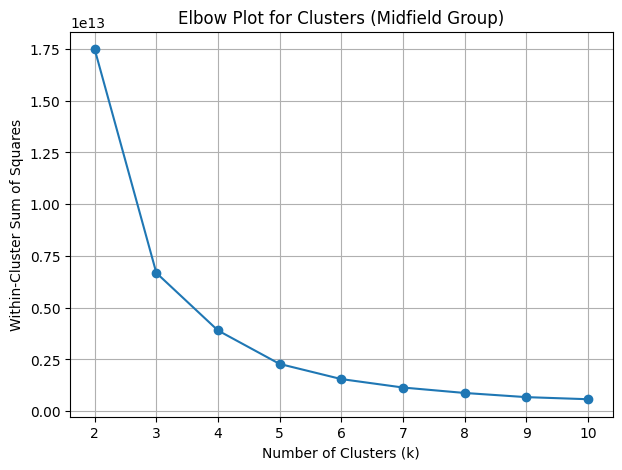

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- Attack Group Elbow Plot ---
list_wcss_attack = []

for k in range(2, 11):
    kmeans_attack = KMeans(n_clusters=k, n_init=5, random_state=0)
    kmeans_attack.fit(features_attack)
    list_wcss_attack.append(kmeans_attack.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(range(2, 11), list_wcss_attack, marker='o')
plt.title('Elbow Plot for Clusters (Attack Group)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()


# --- Defender Group Elbow Plot ---
list_wcss_defender = []

for k in range(2, 11):
    kmeans_defender = KMeans(n_clusters=k, n_init=5, random_state=0)
    kmeans_defender.fit(features_defender)
    list_wcss_defender.append(kmeans_defender.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(range(2, 11), list_wcss_defender, marker='o')
plt.title('Elbow Plot for Clusters (Defender Group)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()


# --- Midfield Group Elbow Plot ---
list_wcss_midfield = []

for k in range(2, 11):
    kmeans_midfield = KMeans(n_clusters=k, n_init=5, random_state=0)
    kmeans_midfield.fit(features_midfield)
    list_wcss_midfield.append(kmeans_midfield.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(range(2, 11), list_wcss_midfield, marker='o')
plt.title('Elbow Plot for Clusters (Midfield Group)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()


## 5.8.5 Grid Search
Using Grid Search to see if we can improve the accuracy on our random forest classifier. Same methodology as previously.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    # these params were taking too long
    # 'n_estimators': [100, 200, 300],
    # 'max_depth': [10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'class_weight': ['balanced', None]
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 4],
    'class_weight': ['balanced']
}

# Initialize GridSearchCV
# cv - number of cross-validation folds, increasing it improves reliability but increases runtime
# scoring defines the evaluation metric
# n_jobs parallelizes the search (-1) for all availalbe processors
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    # reduced this from 5 to 3
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.47823348556502815
Test Accuracy: 0.5050454086781029


# 6.0 Player Market Value Modeling

## 6.1 Preprocessing - Create Features and Labels
Let's try to look at what factors most affect player market value - let's use the deduped df

In [ ]:
# most_recent_player_attributes_df = transfer_player_attributes_with_id.groupby('player_fifa_api_id')['date'].idxmax()
# # print(most_recent_player_attributes_df)
# deduped_df_market_value = transfer_player_attributes_with_id.loc[most_recent_player_attributes_df].reset_index(drop=True)
player_attributes_df['date'] = pd.to_datetime(player_attributes_df['date'])
# find the index of the most recent date for each player based on the player_fifa_api_id column
# idxmax returns the index of the row with the max date for each player group
most_recent_player_attributes_df = player_attributes_df.groupby('player_fifa_api_id')['date'].idxmax()

deduped_df_market_value = player_attributes_df.loc[most_recent_player_attributes_df].reset_index(drop=True)

player_market_value_feature =  pd.merge(transfer_value_with_id, deduped_df_market_value,
                                        on='player_api_id', how='inner')

In [ ]:
player_market_value_feature = player_market_value_feature.drop(columns=['id_y','player_fifa_api_id_y','highest_market_value_in_eur','player_api_id','player_fifa_api_id_x','first_name','player_id','foot','last_name','date_of_birth','name','last_season','id_x','current_club_name','player_code','player_name','birthday','city_of_birth','date_of_birth','contract_expiration_date','agent_name','image_url','url','current_club_domestic_competition_id','country_of_citizenship','date'])

encoded_df_market_value = pd.get_dummies(player_market_value_feature, columns=['attacking_work_rate', 'defensive_work_rate', 'position','sub_position', 'preferred_foot', 'country_of_birth'])

# encoded_df_market_value = encoded_df_market_value.drop(columns=['preferred_foot'])

In [ ]:
player_market_value_feature.columns

Index(['current_club_id', 'country_of_birth', 'sub_position', 'position',
       'height_in_cm', 'market_value_in_eur', 'height', 'weight',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [ ]:
# encoded_df_market_value.sub_position.unique()

In [ ]:
encoded_df_market_value

,current_club_id,height_in_cm,market_value_in_eur,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,...,country_of_birth_United Arab Emirates,country_of_birth_United States,country_of_birth_Uruguay,country_of_birth_Uzbekistan,country_of_birth_Venezuela,country_of_birth_Wales,country_of_birth_Yugoslavia (Republic),country_of_birth_Zaire,country_of_birth_Zambia,country_of_birth_Zimbabwe
0,398,184.0,1000000.0,182.88,185,79.0,79.0,62.0,84.0,88.0,...,False,False,False,False,False,False,False,False,False,False
1,16,190.0,750000.0,190.50,198,79.0,79.0,14.0,11.0,17.0,...,False,False,False,False,False,False,False,False,False,False
2,1091,NaN,1000000.0,187.96,165,80.0,80.0,78.0,83.0,82.0,...,False,False,False,False,False,False,False,False,False,False
3,27,194.0,100000.0,193.04,216,75.0,75.0,12.0,13.0,13.0,...,False,False,False,False,False,False,False,False,False,False
4,33,NaN,1500000.0,193.04,203,74.0,74.0,59.0,24.0,78.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5057,1005,183.0,2800000.0,175.26,148,58.0,71.0,39.0,58.0,64.0,...,False,False,False,False,False,False,False,False,False,False
5058,405,178.0,42000000.0,180.34,154,71.0,85.0,72.0,60.0,57.0,...,False,False,False,False,False,False,False,False,False,False
5059,1421,189.0,200000.0,187.96,176,63.0,72.0,39.0,48.0,71.0,...,False,False,False,False,False,False,False,False,False,False
5060,1082,172.0,4000000.0,172.72,141,69.0,84.0,65.0,68.0,51.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# encoded_df_market_value = encoded_df_market_value.drop(columns = ['date_of_birth','birthday','first_name','last_name','player_code','country_of_birth','city_of_birth','country_of_citizenship','sub_position','position','foot','contract_expiration_date','agent_name','image_url','url','current_club_domestic_competition_id','current_club_name','name','player_name', 'highest_market_value_in_eur','player_id','player_api_id','player_fifa_api_id_x','player_fifa_api_id_y','id_x','id_y'])

In [ ]:
encoded_df_market_value = encoded_df_market_value.dropna()

In [ ]:
features = encoded_df_market_value.drop(columns=['market_value_in_eur'])

In [ ]:
target = encoded_df_market_value['market_value_in_eur']

In [ ]:
features.columns

Index(['current_club_id', 'height_in_cm', 'height', 'weight', 'overall_rating',
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing',
       ...
       'country_of_birth_United Arab Emirates',
       'country_of_birth_United States', 'country_of_birth_Uruguay',
       'country_of_birth_Uzbekistan', 'country_of_birth_Venezuela',
       'country_of_birth_Wales', 'country_of_birth_Yugoslavia (Republic)',
       'country_of_birth_Zaire', 'country_of_birth_Zambia',
       'country_of_birth_Zimbabwe'],
      dtype='object', length=211)

In [ ]:
seed = 42

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2, random_state=seed)
Counter(y_test)

Counter({2000000.0: 13,
         1500000.0: 17,
         150000.0: 65,
         3500000.0: 9,
         200000.0: 105,
         50000.0: 62,
         400000.0: 55,
         700000.0: 19,
         300000.0: 71,
         250000.0: 75,
         800000.0: 11,
         5000000.0: 6,
         350000.0: 23,
         600000.0: 17,
         6000000.0: 3,
         75000.0: 21,
         1000000.0: 34,
         7500000.0: 1,
         100000.0: 103,
         4000000.0: 8,
         500000.0: 45,
         25000.0: 19,
         275000.0: 5,
         900000.0: 8,
         175000.0: 18,
         10000.0: 4,
         125000.0: 20,
         450000.0: 9,
         45000000.0: 1,
         3000000.0: 12,
         65000000.0: 1,
         325000.0: 8,
         20000000.0: 2,
         2500000.0: 11,
         1800000.0: 4,
         225000.0: 10,
         1200000.0: 5,
         850000.0: 1,
         9000000.0: 2,
         15000000.0: 2,
         1700000.0: 1,
         650000.0: 7,
         6500000.0: 2,
         11

Let's try a logistic regression here.

In [ ]:
# TO-DO: Import required libraries
from sklearn.linear_model import LogisticRegression

# TO-DO: Initialize model with default parameters and fit it on the training set
regression = LogisticRegression()

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
regression.fit(X_train, y_train)

# TO-DO: Find the accuracy and store the value in `log_acc`
log_acc = regression.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Accuracy for Logistic Regression:", log_acc)

Accuracy for Logistic Regression: 0.09435897435897436


## 6.2 Random Forest Classifier

Let's try a random forest classifier here.

In [ ]:
# TO-DO: Import required libraries
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# TO-DO: Initialize model with default parameters and fit it on the training set
random_forest = RandomForestClassifier(class_weight = 'balanced', n_estimators = 120, max_depth = 30, random_state = 42)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
random_forest.fit(X_train, y_train)

# TO-DO: Find the accuracy and store the value in `rf_acc`
rf_acc= random_forest.score(X_test,y_test)

predictions = random_forest.predict(X_test)
# TO-DO: Compute the confusion matrix and save it to `rf_confusion`
rf_confusion = confusion_matrix(y_test, predictions)

## 6.3 Plot Feature Importances

<ipython-input-172-a1983751d765>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, palette='magma', y='Feature', x='Feature Importance')


Text(0, 0.5, 'Feature')

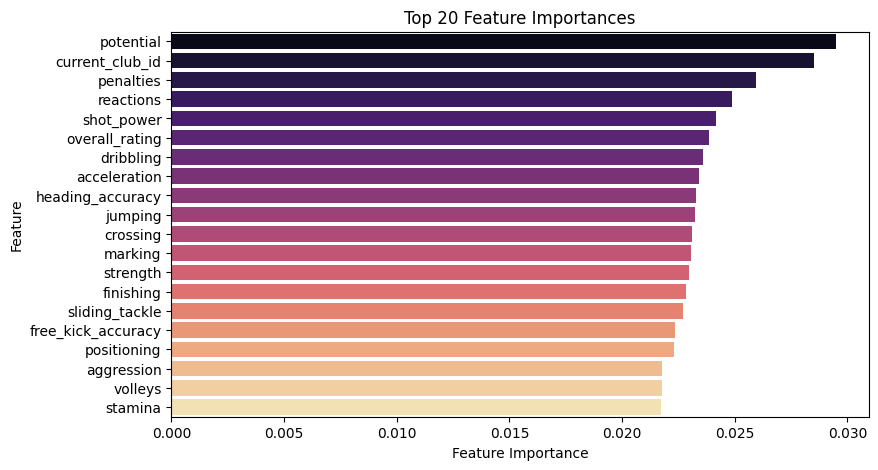

In [ ]:
feature_importance = random_forest.feature_importances_
# TO-DO: Get the top 10 and Create a DataFrame `feature_importance_df`
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Feature Importance': feature_importance
})
# TO-DO: Visualize the top 10 feature importance using a barplot
feature_importance_df = feature_importance_df.sort_values(by='Feature Importance', ascending=False).head(20)
# TO-DO: Analyze the top 10 features to determine if they make sense, and provide your reasoning
plt.figure(figsize = (9,5))

sns.barplot(data=feature_importance_df, palette='magma', y='Feature', x='Feature Importance')
plt.title('Top 20 Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

These feature importances all look the same? interesting

## 6.4 Understanding Peak Age Performance

When finding the player that has the optimal performance now, an undenible factor is the age of this player. Intiutivly, we can think of it like so: a too young of a player hasn't had time mature and get enough experience to improve their skills to the full potential, and one who is too old will lack the energy and biological detriments may have taken place.

According to an article by the [Centre of Excellence in Population Ageing Performance](https://cepar.edu.au/sites/default/files/peak-performance-age-sport.pdf)

: "Past research found
that forwards peak around age 25 (Dendir 2016)...
Dendir links these to the fact that forwards need to run
and shuffle, endure more physical contact, and require
more explosive power." Do we also see this in our data?

The following steps are taken:

Produce a list of leagues that are considered the highest diffcult leagues. This will ensure that we have a similar skill bar when a goal or an assist is scored. For a basketball analogy: A d-league point should not contribute the same as an NBA point.

Calculate the 250 top performing atheltes by goals and assists every year.
Produce a distribution based on age.


In [ ]:
# Italian, Germany, Spain, Great Britian, French
top_leagues = ['IT1', 'L1', 'ES1', 'GB1', 'FR1']

In [ ]:
top_league_games = transfermarkt_games_df[transfermarkt_games_df['competition_id'].isin(top_leagues)]
top_league_games.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321027,L1,2013,1. Matchday,2013-08-11,33,41,3,3,8.0,...,Veltins-Arena,61973.0,Manuel Gräfe,https://www.transfermarkt.co.uk/fc-schalke-04_...,4-2-3-1,4-2-3-1,FC Schalke 04,Hamburger SV,3:3,domestic_league
1,2321033,L1,2013,1. Matchday,2013-08-10,23,86,0,1,13.0,...,EINTRACHT-Stadion,23000.0,Deniz Aytekin,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-3-1-2,Eintracht Braunschweig,Sportverein Werder Bremen von 1899,0:1,domestic_league
2,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
3,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
4,2321072,L1,2013,5. Matchday,2013-09-14,16,41,6,2,1.0,...,SIGNAL IDUNA PARK,80645.0,Tobias Welz,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,3-5-2,Borussia Dortmund,Hamburger SV,6:2,domestic_league


In [ ]:
# transfermarkt_game_events_df where the game_id is in top_league_games
top_game_goals_df = pd.merge(transfermarkt_game_events_df, top_league_games[['game_id', 'season']], on='game_id', how='right')
top_game_goals_df

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id,season
0,c50d6a247955347eca8a699a79623589,2013-08-11,2321027,4.0,Cards,41.0,4192.0,"1. Yellow card , Dissent",NaN,NaN,2013
1,63254978fdb0803239e07c7a433de5cf,2013-08-11,2321027,12.0,Goals,41.0,4192.0,", Penalty, 1. Goal of the Season Assist: Handb...",NaN,82105.0,2013
2,0f7c9b769dff25617499270e18da43e1,2013-08-11,2321027,2.0,Goals,33.0,4357.0,", Right-footed shot, 1. Goal of the Season Ass...",NaN,85148.0,2013
3,cbcb35d42ae5d7086b857946a2a3a28c,2013-08-11,2321027,45.0,Goals,33.0,4357.0,", Header, 2. Goal of the Season Assist: , Cros...",NaN,6636.0,2013
4,757638bdeb99c09d5ce9580fe17a2712,2013-08-11,2321027,44.0,Cards,33.0,6636.0,"1. Yellow card , Foul",NaN,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...
309044,ea39201ef1251b44f098d524050f14d3,2022-05-21,3614910,46.0,Substitutions,252.0,394304.0,", Tactical",315862.0,NaN,2021
309045,403e7877ba84182a7026c5d574955cf4,2022-05-21,3614910,46.0,Substitutions,1025.0,471004.0,", Tactical",818882.0,NaN,2021
309046,db216ca225571a8989b43b363611b0bc,2022-05-21,3614910,66.0,Goals,1025.0,486624.0,", Right-footed shot, 6. Goal of the Season Ass...",NaN,NaN,2021
309047,653011bd3b9bc018d934414eaa821420,2022-05-21,3614910,72.0,Substitutions,1025.0,818878.0,", Tactical",591949.0,NaN,2021


In [ ]:
top_game_goals_df = top_game_goals_df[top_game_goals_df['type'] == 'Goals']
top_game_goals_df = top_game_goals_df[['season', 'player_id', 'player_assist_id']]
top_game_goals_df

,season,player_id,player_assist_id
1,2013,4192.0,82105.0
2,2013,4357.0,85148.0
3,2013,4357.0,6636.0
5,2013,39106.0,44713.0
9,2013,58379.0,42044.0
...,...,...,...
309025,2019,46104.0,146854.0
309027,2019,143029.0,174196.0
309029,2019,215977.0,372712.0
309030,2019,283994.0,524929.0


In [ ]:
# Grouping the data by 'season' and 'player_id' and summing the values
top_goalscores_and_assists = (
    top_game_goals_df.groupby(['season', 'player_id'], as_index=False)
    .agg(goals=('player_id', 'size'),  # Count the number of rows as 'Goals'
         assists=('player_assist_id', lambda x: x.notna().sum()))  # Count non-NaN assists
)

# Renaming the columns for clarity
top_goalscores_and_assists.rename(columns={
    'season': 'season',
    'player_id': 'player_id',
    'goals': 'goals',
    'assists': 'assists'
}, inplace=True)

top_goalscores_and_assists

,season,player_id,goals,assists
0,2012,10.0,15,15
1,2012,65.0,15,14
2,2012,132.0,2,2
3,2012,215.0,8,7
4,2012,277.0,2,1
...,...,...,...,...
17323,2024,1071956.0,1,1
17324,2024,1076815.0,1,0
17325,2024,1119453.0,2,1
17326,2024,1124005.0,1,1


In [ ]:
top_goalscores_and_assists_2024= top_goalscores_and_assists[top_goalscores_and_assists['season'] == 2024]
display(len(top_goalscores_and_assists_2024))
top_goalscores_and_assists_not_2024= top_goalscores_and_assists[top_goalscores_and_assists['season'] != 2024]
display(len(top_goalscores_and_assists_not_2024))

885

16443

In [ ]:
top_goalscores_and_assists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17328 entries, 0 to 17327
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   season     17328 non-null  int64  
 1   player_id  17328 non-null  float64
 2   goals      17328 non-null  int64  
 3   assists    17328 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 541.6 KB


In [ ]:
top_goalscores_and_assists['goals_plus_assists'] = top_goalscores_and_assists['goals'] + top_goalscores_and_assists['assists']

top_goalscores_and_assists = top_goalscores_and_assists.sort_values(by=['season', 'goals_plus_assists'], ascending=[True, False])
top_goalscores_and_assists = top_goalscores_and_assists.groupby('season').head(50)
# make player_id an int
top_goalscores_and_assists['player_id'] = top_goalscores_and_assists['player_id'].astype(int)
#season not finished yet
top_goalscores_and_assists = top_goalscores_and_assists[top_goalscores_and_assists['season'] != 2024]
top_goalscores_and_assists

<ipython-input-180-9ff40cd0ba95>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_goalscores_and_assists['player_id'] = top_goalscores_and_assists['player_id'].astype(int)


,season,player_id,goals,assists,goals_plus_assists
494,2012,28003,46,39,85
227,2012,8198,35,27,62
65,2012,3455,30,25,55
820,2012,48280,29,26,55
179,2012,6237,25,25,50
...,...,...,...,...,...
15631,2023,326029,13,12,25
16346,2023,776890,14,11,25
15111,2023,96341,13,11,24
15460,2023,255508,13,11,24


In [ ]:
# find all the players from transfermarkt_players_df that is in top_goalscores_and_assists, by player_id
top_goalscores_and_assists_players = pd.merge(top_goalscores_and_assists, transfermarkt_players_df[['player_id', 'date_of_birth']], on='player_id', how='left')
# get just the year in date_of_birth
top_goalscores_and_assists_players['year_of_birth'] = pd.to_datetime(top_goalscores_and_assists_players['date_of_birth']).dt.year
# get the year difference between season and year_of_birth
top_goalscores_and_assists_players['year_during_competition'] = top_goalscores_and_assists_players['season'].astype(int) - top_goalscores_and_assists_players['year_of_birth']


In [ ]:
top_goalscores_and_assists_players

,season,player_id,goals,assists,goals_plus_assists,date_of_birth,year_of_birth,year_during_competition
0,2012,28003,46,39,85,1987-06-24,1987.0,25.0
1,2012,8198,35,27,62,1985-02-05,1985.0,27.0
2,2012,3455,30,25,55,1981-10-03,1981.0,31.0
3,2012,48280,29,26,55,1987-02-14,1987.0,25.0
4,2012,6237,25,25,50,1984-01-25,1984.0,28.0
...,...,...,...,...,...,...,...,...
595,2023,326029,13,12,25,1999-01-19,1999.0,24.0
596,2023,776890,14,11,25,2001-06-20,2001.0,22.0
597,2023,96341,13,11,24,1993-05-13,1993.0,30.0
598,2023,255508,13,11,24,1994-06-15,1994.0,29.0


<ipython-input-183-edf4ddc97a41>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_stats = top_goalscores_and_assists_players.groupby('age_bin').agg(


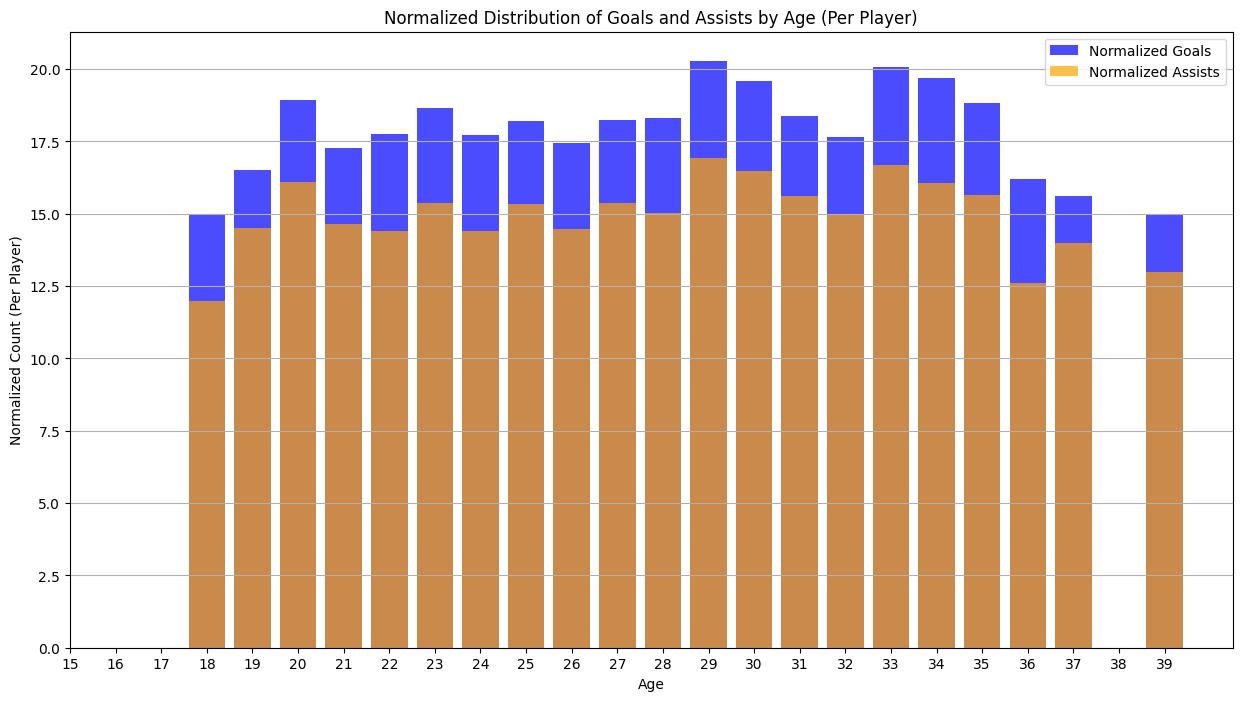

Peak performance occurs at age: 29.0 years old
Normalized Goals + Assists during peak performance: 37.2093023255814


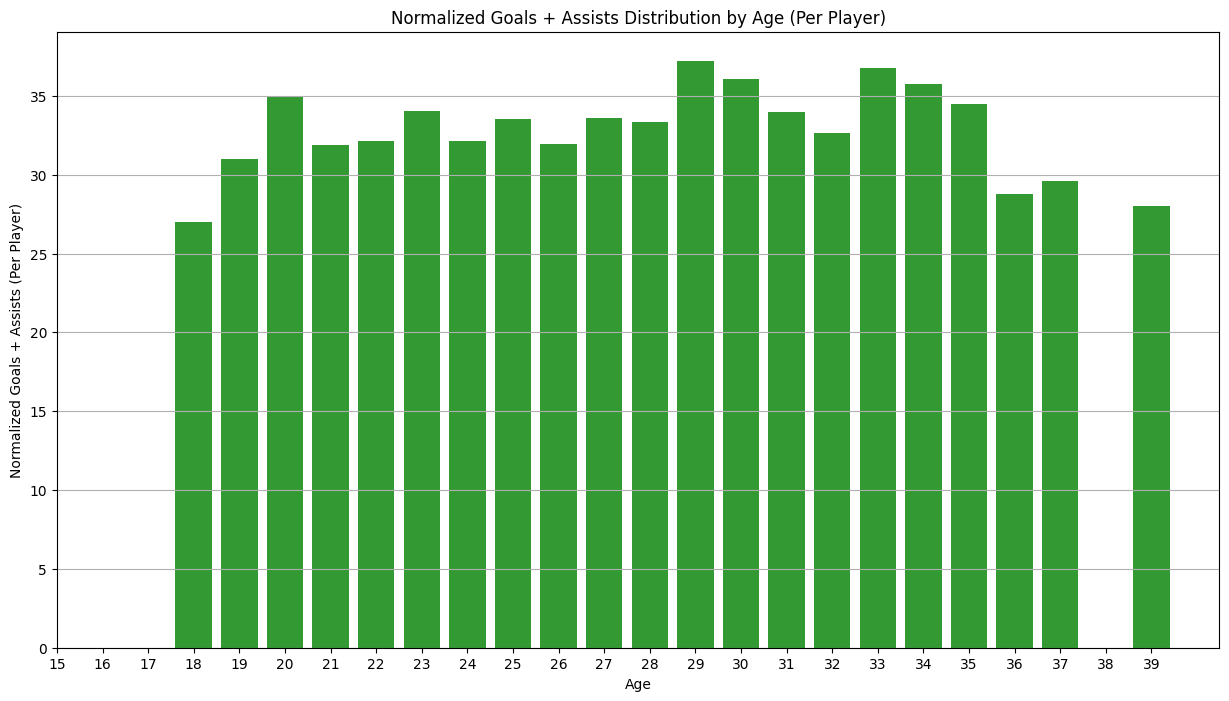

In [ ]:
age_bins = np.arange(15, 41, 1)  # Bins for ages 15 to 40 (inclusive)
top_goalscores_and_assists_players['age_bin'] = pd.cut(
    top_goalscores_and_assists_players['year_during_competition'], bins=age_bins, right=False, labels=age_bins[:-1]
)

# Step 2: Group by single-year age bins and calculate total stats and player counts
binned_stats = top_goalscores_and_assists_players.groupby('age_bin').agg(
    total_goals=('goals', 'sum'),
    total_assists=('assists', 'sum'),
    total_goals_plus_assists=('goals_plus_assists', 'sum'),
    player_count=('player_id', 'count')  # Count of players in each age group
).reset_index()

# Step 3: Normalize the stats by dividing by the player count
binned_stats['normalized_goals'] = binned_stats['total_goals'] / binned_stats['player_count']
binned_stats['normalized_assists'] = binned_stats['total_assists'] / binned_stats['player_count']
binned_stats['normalized_goals_plus_assists'] = binned_stats['total_goals_plus_assists'] / binned_stats['player_count']

# Step 4: Plot the normalized distribution of goals and assists by age
plt.figure(figsize=(15, 8))

# Normalized goals and assists distribution
plt.bar(binned_stats['age_bin'].astype(int), binned_stats['normalized_goals'], alpha=0.7, label='Normalized Goals', color='blue')
plt.bar(binned_stats['age_bin'].astype(int), binned_stats['normalized_assists'], alpha=0.7, label='Normalized Assists', color='orange')

plt.title('Normalized Distribution of Goals and Assists by Age (Per Player)')
plt.xlabel('Age')
plt.ylabel('Normalized Count (Per Player)')
plt.xticks(binned_stats['age_bin'].astype(int))
plt.legend()
plt.grid(axis='y')
plt.show()

# Step 5: Identify peak performance (age with the highest normalized goals + assists)
peak_performance = binned_stats.loc[binned_stats['normalized_goals_plus_assists'].idxmax()]
print(f"Peak performance occurs at age: {peak_performance['age_bin']} years old")
print(f"Normalized Goals + Assists during peak performance: {peak_performance['normalized_goals_plus_assists']}")

# Step 6: Plot normalized goals + assists distribution separately
plt.figure(figsize=(15, 8))
plt.bar(binned_stats['age_bin'].astype(int), binned_stats['normalized_goals_plus_assists'], color='green', alpha=0.8)

plt.title('Normalized Goals + Assists Distribution by Age (Per Player)')
plt.xlabel('Age')
plt.ylabel('Normalized Goals + Assists (Per Player)')
plt.xticks(binned_stats['age_bin'].astype(int))
plt.grid(axis='y')
plt.show()

Showing that peak perforamnce is at 29 years old.

# 7.0 Team Performance Analysis

## 7.1 Cleaning

Here we look at team performance across matches, and determine which teams performance the best. We will then look at match prediction based on the team attributes.

In [ ]:
team_attributes_df.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

Let's get rid of ambiguous or unneccesary columns from the match_df

In [ ]:
cleaned_match= match_df[[col for col in match_df.columns if len(col) >3]]
cleaned_match.columns
cleaned_match= cleaned_match[[col for col in cleaned_match.columns if 'player' not in col]]
cleaned_match= cleaned_match.drop(columns=['B365H', 'B365D', 'B365A'])
cleaned_match.shape

(25979, 18)

In [ ]:
cleaned_match.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession'],
      dtype='object')

Let's see how many results ended in ties

In [ ]:
ties= cleaned_match[cleaned_match['home_team_goal']==cleaned_match['away_team_goal']]
ties.shape

(6596, 18)

## 7.2 Feature Engineering and Data Integration

Let's feature engineer attributes that will represent the game results

In [ ]:
cleaned_match['home_team_resulting_points']= cleaned_match.apply(lambda x: 1 if x['home_team_goal']>x['away_team_goal'] else .5 if x['home_team_goal']==x['away_team_goal'] else 0,axis=1)
cleaned_match['away_team_resulting_points']= cleaned_match.apply(lambda x: 1 if x['away_team_goal']>x['home_team_goal'] else .5 if x['home_team_goal']==x['away_team_goal'] else 0,axis=1)
cleaned_match_winning_points= cleaned_match[['home_team_api_id','away_team_api_id','home_team_resulting_points','away_team_resulting_points']]
cleaned_match_winning_points.head()

,home_team_api_id,away_team_api_id,home_team_resulting_points,away_team_resulting_points
0,9987,9993,0.5,0.5
1,10000,9994,0.5,0.5
2,9984,8635,0.0,1.0
3,9991,9998,1.0,0.0
4,7947,9985,0.0,1.0


Lets tally totals for each team to determine team performance across matches

In [ ]:
home_team_count_and_totals= cleaned_match_winning_points.groupby('home_team_api_id',as_index=False).agg(
    home_team_count=('home_team_api_id','count'),
    home_team_points=('home_team_resulting_points','sum')
)
away_team_count_and_totals= cleaned_match_winning_points.groupby('away_team_api_id',as_index=False).agg(
    away_team_count=('away_team_api_id','count'),
    away_team_points=('away_team_resulting_points','sum')
)
home_team_count_and_totals.head()
away_team_count_and_totals.head()
total_team_count= pd.merge(home_team_count_and_totals,away_team_count_and_totals,left_on='home_team_api_id',right_on='away_team_api_id',how='inner')
total_team_count


,home_team_api_id,home_team_count,home_team_points,away_team_api_id,away_team_count,away_team_points
0,1601,120,68.0,1601,120,52.5
1,1773,45,22.5,1773,45,13.5
2,1957,120,76.5,1957,120,42.5
3,2033,75,32.5,2033,75,27.0
4,2182,120,87.5,2182,120,66.5
...,...,...,...,...,...,...
294,158085,49,23.5,158085,49,19.0
295,177361,15,7.0,177361,15,5.5
296,188163,17,5.0,188163,17,6.0
297,208931,19,8.5,208931,19,6.0


Let's get the winning percentage for each team

In [ ]:
total_team_count['winning_percentage']= total_team_count.apply(lambda x: (x['home_team_points'] + x['away_team_points'])/(x['home_team_count']+x['away_team_count']),axis=1)
total_team_count= total_team_count.sort_values('winning_percentage',ascending=False)
total_team_count.head()
total_team_count= total_team_count[['home_team_api_id','winning_percentage']]
total_team_count= total_team_count.rename(columns={'home_team_api_id':'team_api_id'})
total_team_count.head()

,team_api_id,winning_percentage
141,8634,0.840461
175,9773,0.822581
174,9772,0.818548
140,8633,0.809211
233,9925,0.799342


Merge with teams_df and sort to get best performing teams

In [ ]:
team_df_with_winning_percentage= pd.merge(team_df,total_team_count,on='team_api_id',how='left')
team_df_with_winning_percentage= team_df_with_winning_percentage.sort_values('winning_percentage',ascending=False).reset_index(drop=True)
team_df_with_winning_percentage.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name', 'winning_percentage'],
      dtype='object')

## 7.3 Visualization

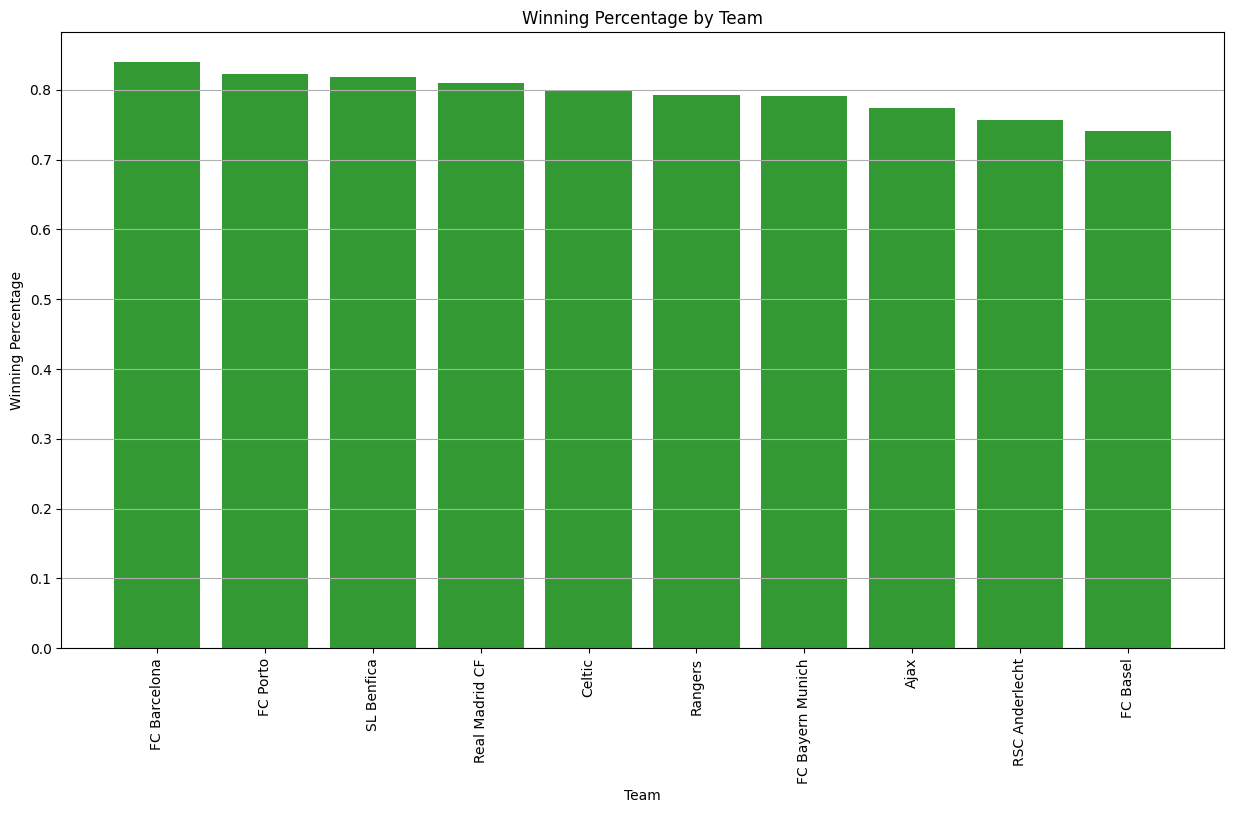

In [ ]:
# Plot Best Teams

top_teams = team_df_with_winning_percentage.head(10)

plt.figure(figsize=(15, 8))
plt.bar(top_teams['team_long_name'], top_teams['winning_percentage'], color='green', alpha=0.8)

plt.title('Winning Percentage by Team')
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# 8.0 Match Outcome Predictions

## 8.1 Prepare the data

In [ ]:
team_attributes_df.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

It may be worthwhile at some point to merge the match and team attribute datasets based on their corresponding dates - e.g. to make each match with *that particular match's most recent* attribute evaluation - therefore, we retrieve unique dates here, but actual merging we leave for a later exercise, and instead use the *most recent overall* evaluation that took place in 2015, as instructed by our TA

In [ ]:
# Get unique dates in both the team_attributes_df and the cleaned_matches_df
unique_dates_team_attributes = team_attributes_df['date'].unique()
unique_dates_matches = cleaned_match['date'].unique()

print("Unique dates in team_attributes_df:", unique_dates_team_attributes)
print(len(unique_dates_team_attributes))
print("Unique dates in cleaned_match:", unique_dates_matches)
print(len(unique_dates_matches))

Unique dates in team_attributes_df: <DatetimeArray>
['2010-02-22 00:00:00', '2014-09-19 00:00:00', '2015-09-10 00:00:00',
 '2011-02-22 00:00:00', '2012-02-22 00:00:00', '2013-09-20 00:00:00']
Length: 6, dtype: datetime64[ns]
6
Unique dates in cleaned_match: ['2008-08-17 00:00:00' '2008-08-16 00:00:00' '2008-09-24 00:00:00' ...
 '2016-05-22 00:00:00' '2016-05-25 00:00:00' '2015-08-13 00:00:00']
1694


In [ ]:
# Dedupe team attributes by most recent date
team_attributes_df = team_attributes_df.sort_values(by='date', ascending=False)
deduped_team_attributes_df = team_attributes_df.drop_duplicates(subset='team_api_id', keep='first')

Let's put matches with corresponding statistics of each team in one dataframe

In [ ]:
# merge cleaned match winning points with deduped team_attributes_df
deduped_team_with_winning= pd.merge(cleaned_match_winning_points,deduped_team_attributes_df,left_on='home_team_api_id',right_on='team_api_id',how='inner')
deduped_team_with_winning= pd.merge(deduped_team_with_winning,deduped_team_attributes_df,left_on='away_team_api_id',right_on='team_api_id',how='inner',suffixes=('_home','_away'))
deduped_team_with_winning.head()

,home_team_api_id,away_team_api_id,home_team_resulting_points,away_team_resulting_points,id_home,team_fifa_api_id_home,team_api_id_home,date_home,buildUpPlaySpeed_home,buildUpPlaySpeedClass_home,...,chanceCreationShooting_away,chanceCreationShootingClass_away,chanceCreationPositioningClass_away,defencePressure_away,defencePressureClass_away,defenceAggression_away,defenceAggressionClass_away,defenceTeamWidth_away,defenceTeamWidthClass_away,defenceDefenderLineClass_away
0,9987,9993,0.5,0.5,490,673,9987,2015-09-10,58,Balanced,...,49,Normal,Organised,45,Medium,46,Press,67,Wide,Cover
1,10000,9994,0.5,0.5,1458,15005,10000,2015-09-10,54,Balanced,...,62,Normal,Organised,45,Medium,52,Press,52,Normal,Cover
2,9984,8635,0.0,1.0,300,1750,9984,2015-09-10,53,Balanced,...,47,Normal,Organised,53,Medium,50,Press,61,Normal,Cover
3,9991,9998,1.0,0.0,502,674,9991,2015-09-10,50,Balanced,...,46,Normal,Organised,46,Medium,45,Press,47,Normal,Cover
4,8203,8342,0.5,0.5,665,110724,8203,2015-09-10,52,Balanced,...,47,Normal,Organised,51,Medium,50,Press,57,Normal,Cover


Here, we tried feature engineering that we thought may help represent the differences between the each teams statistics which will be useful for regression models. In particular, we retrive the differences between the two teams values across all numeric attributes. However, since it significantly altered the regression result, we commented this out here, and will leave it open for more research at a later point

In [ ]:
# Get difference between home team and away team in each column
matches_with_diffs= deduped_team_with_winning.copy()
# for col in deduped_team_with_winning.columns:
#     if col.endswith('_home') and pd.api.types.is_numeric_dtype(deduped_team_with_winning[col]):
#         new_col_name = col[:-5] + '_diff'
#         away_name= col.replace('_home','_away')
#         if away_name in deduped_team_with_winning.columns:
#           matches_with_diffs[new_col_name] = matches_with_diffs[col] - matches_with_diffs[away_name]
#           matches_with_diffs.drop(columns=[col,away_name],inplace=True)
matches_with_diffs.columns

Index(['home_team_api_id', 'away_team_api_id', 'home_team_resulting_points',
       'away_team_resulting_points', 'id_home', 'team_fifa_api_id_home',
       'team_api_id_home', 'date_home', 'buildUpPlaySpeed_home',
       'buildUpPlaySpeedClass_home', 'buildUpPlayDribblingClass_home',
       'buildUpPlayPassing_home', 'buildUpPlayPassingClass_home',
       'buildUpPlayPositioningClass_home', 'chanceCreationPassing_home',
       'chanceCreationPassingClass_home', 'chanceCreationCrossing_home',
       'chanceCreationCrossingClass_home', 'chanceCreationShooting_home',
       'chanceCreationShootingClass_home',
       'chanceCreationPositioningClass_home', 'defencePressure_home',
       'defencePressureClass_home', 'defenceAggression_home',
       'defenceAggressionClass_home', 'defenceTeamWidth_home',
       'defenceTeamWidthClass_home', 'defenceDefenderLineClass_home',
       'id_away', 'team_fifa_api_id_away', 'team_api_id_away', 'date_away',
       'buildUpPlaySpeed_away', 'buildUpPlay

In [ ]:
# One hot encode all non-numeric columns
matches_with_diffs= pd.get_dummies(matches_with_diffs)
matches_with_diffs.head()

,home_team_api_id,away_team_api_id,home_team_resulting_points,away_team_resulting_points,id_home,team_fifa_api_id_home,team_api_id_home,date_home,buildUpPlaySpeed_home,buildUpPlayPassing_home,...,defencePressureClass_away_High,defencePressureClass_away_Medium,defenceAggressionClass_away_Contain,defenceAggressionClass_away_Double,defenceAggressionClass_away_Press,defenceTeamWidthClass_away_Narrow,defenceTeamWidthClass_away_Normal,defenceTeamWidthClass_away_Wide,defenceDefenderLineClass_away_Cover,defenceDefenderLineClass_away_Offside Trap
0,9987,9993,0.5,0.5,490,673,9987,2015-09-10,58,38,...,False,True,False,False,True,False,False,True,True,False
1,10000,9994,0.5,0.5,1458,15005,10000,2015-09-10,54,51,...,False,True,False,False,True,False,True,False,True,False
2,9984,8635,0.0,1.0,300,1750,9984,2015-09-10,53,43,...,False,True,False,False,True,False,True,False,True,False
3,9991,9998,1.0,0.0,502,674,9991,2015-09-10,50,37,...,False,True,False,False,True,False,True,False,True,False
4,8203,8342,0.5,0.5,665,110724,8203,2015-09-10,52,40,...,False,True,False,False,True,False,True,False,True,False


In [ ]:
# Drop the twp date columns as it as this datetype is incompatible here
matches_no_dates= matches_with_diffs.drop(columns=['date_home','date_away'])
matches_no_dates

,home_team_api_id,away_team_api_id,home_team_resulting_points,away_team_resulting_points,id_home,team_fifa_api_id_home,team_api_id_home,buildUpPlaySpeed_home,buildUpPlayPassing_home,chanceCreationPassing_home,...,defencePressureClass_away_High,defencePressureClass_away_Medium,defenceAggressionClass_away_Contain,defenceAggressionClass_away_Double,defenceAggressionClass_away_Press,defenceTeamWidthClass_away_Narrow,defenceTeamWidthClass_away_Normal,defenceTeamWidthClass_away_Wide,defenceDefenderLineClass_away_Cover,defenceDefenderLineClass_away_Offside Trap
0,9987,9993,0.5,0.5,490,673,9987,58,38,30,...,False,True,False,False,True,False,False,True,True,False
1,10000,9994,0.5,0.5,1458,15005,10000,54,51,47,...,False,True,False,False,True,False,True,False,True,False
2,9984,8635,0.0,1.0,300,1750,9984,53,43,52,...,False,True,False,False,True,False,True,False,True,False
3,9991,9998,1.0,0.0,502,674,9991,50,37,42,...,False,True,False,False,True,False,True,False,True,False
4,8203,8342,0.5,0.5,665,110724,8203,52,40,47,...,False,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25624,10243,10191,0.5,0.5,451,894,10243,62,46,47,...,False,True,False,False,True,False,True,False,True,False
25625,10190,10191,1.0,0.0,1215,898,10190,52,48,39,...,False,True,False,False,True,False,True,False,True,False
25626,9824,10199,0.0,1.0,445,286,9824,53,56,38,...,False,True,False,False,True,False,True,False,True,False
25627,9956,10179,1.0,0.0,535,322,9956,50,54,52,...,False,True,False,False,True,False,True,False,True,False


In [ ]:
# Get all columns that contain the word id_ or _id
id_cols= [col for col in matches_no_dates.columns if 'id_' in col or '_id' in col]
# Drop all columns that contain id
matches_no_dates= matches_no_dates.drop(columns=id_cols)
matches_no_dates.columns

Index(['home_team_resulting_points', 'away_team_resulting_points',
       'buildUpPlaySpeed_home', 'buildUpPlayPassing_home',
       'chanceCreationPassing_home', 'chanceCreationCrossing_home',
       'chanceCreationShooting_home', 'defencePressure_home',
       'defenceAggression_home', 'defenceTeamWidth_home',
       'buildUpPlaySpeed_away', 'buildUpPlayPassing_away',
       'chanceCreationPassing_away', 'chanceCreationCrossing_away',
       'chanceCreationShooting_away', 'defencePressure_away',
       'defenceAggression_away', 'defenceTeamWidth_away',
       'buildUpPlaySpeedClass_home_Balanced',
       'buildUpPlaySpeedClass_home_Fast', 'buildUpPlaySpeedClass_home_Slow',
       'buildUpPlayDribblingClass_home_Little',
       'buildUpPlayDribblingClass_home_Lots',
       'buildUpPlayDribblingClass_home_Normal',
       'buildUpPlayPassingClass_home_Long',
       'buildUpPlayPassingClass_home_Mixed',
       'buildUpPlayPassingClass_home_Short',
       'buildUpPlayPositioningClass_home

## 8.2 Regression Models and Team Attribute Importance Bar Charts

In [ ]:
# Prepare model for linear regression

# Features = all cols in encoded_matches_df except for home_team_resulting_points
# target - home_team_resulting_points

features= matches_no_dates.drop(columns=['home_team_resulting_points'])
target= matches_no_dates['home_team_resulting_points']

subset_features= features

# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
features= scaler.fit_transform(features)

In [ ]:
seed = 42

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2, random_state=seed)
Counter(y_test)

Counter({1.0: 2349, 0.0: 1508, 0.5: 1269})

In [ ]:
seed = 42

X_train, X_test, y_train, y_test = train_test_split(subset_features,target,test_size = 0.2, random_state=seed)
Counter(y_test)

Counter({1.0: 2349, 0.0: 1508, 0.5: 1269})

In [ ]:
# TO-DO: Import required libraries
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# TO-DO: Initialize model with default parameters and fit it on the training set
reg = LinearRegression()

reg.fit(X_train, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg.predict(X_test)

# TO-DO: Find the R-squared score and store the value in `lin_reg_score`
lin_reg_score = r2_score(y_test,y_pred)
print(lin_reg_score)

1.0


We got a perfect linear regression!

<ipython-input-205-9d2e53219077>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, palette='magma', y='Feature', x='Feature Importance')


Text(0, 0.5, 'Feature')

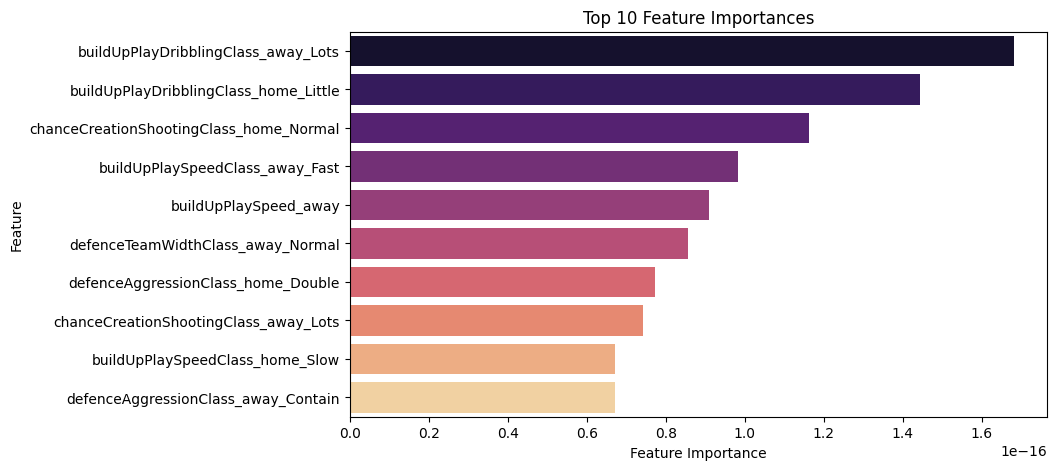

In [ ]:
# Visualize the Linear Regression to see the attributes that matter the most
feature_importance = reg.coef_
# TO-DO: Get the top 10 and Create a DataFrame `feature_importance_df`
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Feature Importance': feature_importance
})
# TO-DO: Visualize the top 10 feature importance using a barplot
feature_importance_df = feature_importance_df.sort_values(by='Feature Importance', ascending=False).head(10)
# TO-DO: Analyze the top 10 features to determine if they make sense, and provide your reasoning
plt.figure(figsize = (9,5))

sns.barplot(data=feature_importance_df, palette='magma', y='Feature', x='Feature Importance')
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

Let's do a Ridge as well

In [ ]:
# TO-DO: Import required libraries
from sklearn.linear_model import Ridge

# TO-DO: Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
ridge=Ridge(alpha=10)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
ridge.fit(X_train, y_train)
reg_ridge = ridge
y_pred = ridge.predict(X_test)
# TO-DO: Find the R-squared score and store the value in `ridge_score`
ridge_score = r2_score(y_test, y_pred)
print("ridge_score: ",ridge_score)

ridge_score:  0.9999921534177483


<ipython-input-207-41c72ad541e4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, palette='magma', y='Feature', x='Feature Importance')


Text(0, 0.5, 'Feature')

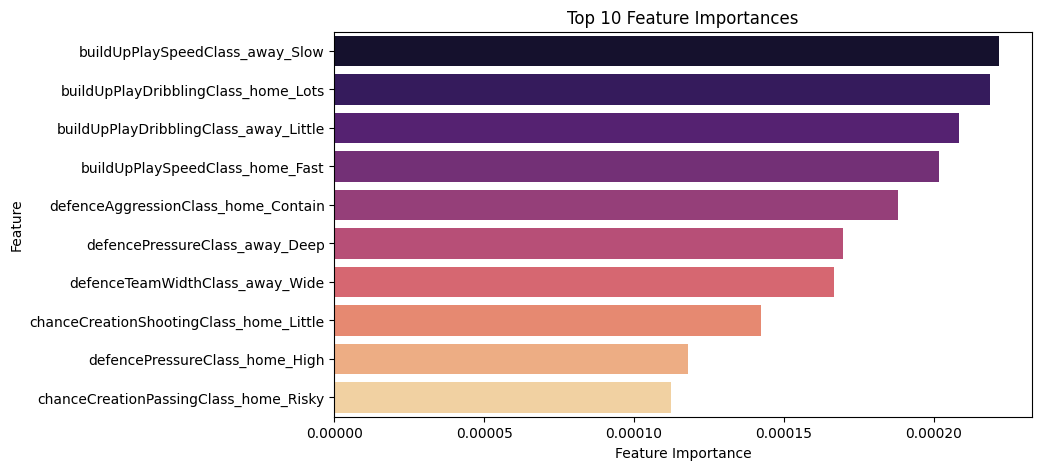

In [ ]:
# Visualize Rigde Data As Well
feature_importance = reg_ridge.coef_
# TO-DO: Get the top 10 and Create a DataFrame `feature_importance_df`
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Feature Importance': feature_importance
    })
# TO-DO: Visualize the top 10 feature importance using a barplot
feature_importance_df = feature_importance_df.sort_values(by='Feature Importance', ascending=False).head(10)
# TO-DO: Analyze the top 10 features to determine if they make sense, and provide your reasoning
plt.figure(figsize = (9,5))

sns.barplot(data=feature_importance_df, palette='magma', y='Feature', x='Feature Importance')
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

# 9.0 Visualizing Player Birth Locations
Suppose we have a player, and **we want to visualize the locations of the other players**, most similar to this player we are choosing. The following section is a pipeline to produce a world-map visualization using a similarity metric. In our case, we are using euclidian distance similarity metric, but this pipeline can be altered so that any visualizations can be made, from an input of a dataframe of columns:

name: str
country_of_birth: str
city_of_birth: str
similarity_score: float, between 0 and 1 inclusive

In our case, we are using the physical features and nationality of a player, as well as the league they play in, to find the most similar features, but this can be altered to visualize the players in terms of similarity in playing styles, tactical fit, and more, as long as a similarity score can be produced.



In [ ]:
from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder

In [ ]:
scaler = StandardScaler()

# Select relevant columns, covert to numeric, scale, perform one hot encoding on all the players
similar_players_df = transfermarkt_players_df[['name', "country_of_birth", "city_of_birth", 'position', 'foot', 'height_in_cm', 'current_club_domestic_competition_id', 'market_value_in_eur']].dropna()
label_encoder = LabelEncoder()
similar_players_df['current_club_domestic_competition_id'] = label_encoder.fit_transform(similar_players_df['current_club_domestic_competition_id'])
similar_players_numeric = pd.get_dummies(similar_players_df, columns=['position', 'foot'])
feature_columns = similar_players_numeric.columns.difference(['name', "country_of_birth", "city_of_birth"]) # we don't want to transform these as they are not numeric
non_numeric_columns = similar_players_df[['name', "country_of_birth", "city_of_birth"]]
scaled_numeric = scaler.fit_transform(similar_players_numeric[feature_columns])
scaled_df = pd.DataFrame(scaled_numeric, columns=feature_columns)
final_scaled_df = pd.concat([non_numeric_columns.reset_index(drop=True), scaled_df.reset_index(drop=True)], axis=1)



Suppose here we want to find the most similar player to Erling Haaland, based on the above metrics

In [ ]:
# Find the target player (Erling Haaland), and perform one hot encoding and scale
target_player = transfermarkt_players_df[transfermarkt_players_df['name'] == "Erling Haaland"]
target_player['current_club_domestic_competition_id'] = label_encoder.transform(target_player['current_club_domestic_competition_id'])
target_numeric = pd.get_dummies(target_player, columns=['position', 'foot'])
target_numeric = target_numeric.reindex(columns=feature_columns, fill_value=0)
target_scaled = scaler.transform(target_numeric)

# Compute Euclidean distances
distances = cdist(target_scaled, scaled_numeric, metric='euclidean').flatten()
final_scaled_df['similarity_score'] = 1 / (1 + distances)  # Invert distance for similarity
player_and_locations_df = final_scaled_df[['name', 'country_of_birth', 'city_of_birth', 'similarity_score']]
player_and_locations_df = player_and_locations_df.sort_values(by='similarity_score', ascending=False)

# getting the top 50 players
player_and_locations_df = player_and_locations_df.head(50)

<ipython-input-210-31555f92c4c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_player['current_club_domestic_competition_id'] = label_encoder.transform(target_player['current_club_domestic_competition_id'])


In [ ]:
player_and_locations_df

,name,country_of_birth,city_of_birth,similarity_score
19387,Erling Haaland,England,Leeds,1.000000
18022,Vinicius Junior,Brazil,São Gonçalo,0.190225
17007,Kylian Mbappé,France,Paris,0.166008
22681,Jude Bellingham,England,Stourbridge,0.153084
26236,Lamine Yamal,Spain,Esplugues de Llobregat,0.115024
19122,Phil Foden,England,Stockport,0.109280
19748,Bukayo Saka,England,London,0.098321
17625,Rodri,Spain,Madrid,0.081697
22649,Jamal Musiala,Germany,Stuttgart,0.080863
17922,Federico Valverde,Uruguay,Montevideo,0.080665


In [ ]:
geolocator = Nominatim(user_agent="soccer_player_mapper")

def geocode_location(city, country):
    try:
        location = geolocator.geocode(f"{city}, {country}")
        if location:
            return location.latitude, location.longitude
    except GeocoderTimedOut:
        pass
    return None, None

# Add latitude and longitude columns
player_and_locations_df["coordinates"] = player_and_locations_df.apply(
    lambda row: geocode_location(row["city_of_birth"], row["country_of_birth"]), axis=1
)
player_and_locations_df["latitude"] = player_and_locations_df["coordinates"].apply(lambda x: x[0])
player_and_locations_df["longitude"] = player_and_locations_df["coordinates"].apply(lambda x: x[1])

# Drop rows where geocoding failed
player_and_locations_df.dropna(subset=["latitude", "longitude"], inplace=True)

soccer_map = folium.Map(location=[20, 0], zoom_start=2)  # World map centered at (20°N, 0°E)
for _, row in player_and_locations_df.iterrows():
    popup_text = f"""
    <b>Name:</b> {row['name']}<br>
    <b>Country:</b> {row['country_of_birth']}<br>
    <b>City:</b> {row['city_of_birth']}<br>
    <b>Similarity Score:</b> {row['similarity_score']}
    """
    folium.CircleMarker(
        location=(row["latitude"], row["longitude"]),
        radius=row["similarity_score"] * 20,  # Adjust multiplier for better sizing
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=300),
    ).add_to(soccer_map)

soccer_map


And we see that the top 2 closest players to Erling Haaland are located in Brazil and France.

# 10.0 Conclusion

While we faced challenges such as NAs, curiously labelled columns, and our necessary information split over two datasets, we worked hard to combine bits of information from both, and used data massaging techiques to get the data into a form best suited for analysis.

This notebook explored player performance, team dynamics, and match outcome prediction in soccer using a data-driven approach. Key findings include the identification of 29 years as the peak performance age, measured by normalized goals and assists per player, and the ranking of top-performing teams based on winning percentages derived from engineered match outcome features. Regression models, including Linear and Ridge Regression, were applied to predict match outcomes, with the top contributing features visualized for interpretability. Additionally, a player similarity pipeline was developed using Euclidean distance, revealing players most similar to Erling Haaland, with their geographic distribution visualized on a world map. All this provides great value to analysts at a soccer club wanting to squeeze better match results using data driven insights.



# Annexure and Additional Analysis

During our project we used the following references.

- https://www.kaggle.com/datasets/hugomathien/soccer

- https://www.kaggle.com/datasets/davidcariboo/player-scores






# Potential Next Steps

- We could develop a streaming application with Apache Storm for continuous prediction of player ratings as updated scores are received.
- We could try a neural network, with hidden layers and varying activation functions.
- Since our data is implictly linked to time, we could attempt a time series analysis to forecast the Player rating over time.

# High Level Stream Processing for Player Rating

We will use Apache Spark to process a stream to predict the Players overall rating. We will use Spark Streaming.

In [ ]:
## Let's install Apache Spark on the local machine

import os

!apt install openjdk-8-jdk-headless
# !wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!wget https://downloads.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz
!tar xf spark-3.5.3-bin-hadoop3.tgz
!pip install findspark

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.3-bin/hadoop3"

In [ ]:
import findspark

findspark.init('./spark-3.5.3-bin-hadoop3')

In [ ]:
# Let's set up a connection to local Spark

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.streaming import StreamingContext

spark = SparkSession.builder.appName("Players").getOrCreate()
sc = spark.sparkContext

In [ ]:
# Next, for Spark we will need to copy the files to HDFS
# So first we need to connect to the HDFS filesystem

######
# From https://diogoalexandrefranco.github.io/interacting-with-hdfs-from-pyspark/
#
# Get fs handler from java gateway
######
URI = sc._gateway.jvm.java.net.URI
Path = sc._gateway.jvm.org.apache.hadoop.fs.Path
FileSystem = sc._gateway.jvm.org.apache.hadoop.fs.FileSystem
fs = FileSystem.get(sc._jsc.hadoopConfiguration())

# Make sure we have an empty directory in HDFS
fs.delete(Path('/in'), True)
fs.mkdirs(Path('/in'))

True

In [ ]:
player_attributes_df.to_csv('player_attributes.csv', index=False)

In [ ]:
# This assumes the player_attributes.csv exists in your colab notebook.
!head player_attributes.csv

id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,

In [ ]:
# Now, to demonstrate Spark's incremental processing, we'll break the
# player_attributes.csv file into segments of 10000 lines each
! split -n 10000 player_attributes.csv

## Creating a Streaming (Microbatched) Query

We will look at doing incremental computation over data as it arrives. To do this we'll use Spark's microbatch capability, where it incrementally re-runs a computation based on a "triggering" event (typically a updated Player rating).


We'll define a "stream query" that gets periodically executed, tracking, for player ratings.
The query will look for csv files as they are added into the /in directory, as a series of chunks in a stream.
We'll parse the CSV format into appropriate columns, arriving at a Spark dataframe.
This will receive an SQL table name, so we can use it in SparkSQL.

In [ ]:
# We need this to set a schema
from pyspark.sql.types import StructType

playerSchema = StructType().add("id", "integer").add("player_fifa_api_id", "integer")\
  .add("player_api_id", "integer").add("date", "string")\
  .add("overall_rating", "double").add("potential", "double").add("preferred_foot", "string")\
  .add("attacking_work_rate", "double").add("defensive_work_rate", "double").add("crossing", "double")\
  .add("finishing","double").add("heading_accuracy","double").add("short_passing","double").add("volleys","double")\
  .add("dribbling","double").add("curve","double").add("free_kick_accuracy","double").add("long_passing","double")\
  .add("ball_control","double").add("acceleration","double").add("sprint_speed","double").add("agility","double")\
  .add("reactions","double").add("balance","double").add("shot_power","double").add("jumping","double").add("stamina","double")\
  .add("strength","double").add("long_shots","double").add("aggression","double").add("interceptions","double").add("positioning","double")\
  .add("vision","double").add("penalties","double").add("marking","double").add("standing_tackle","double").add("sliding_tackle","double")\
  .add("gk_diving","double").add("gk_handling","double").add("gk_kicking","double").add("gk_positioning","double").add("gk_reflexes","double")

## This will be a stream, and in each microbatch we'll read one file at a time
playersStreamDF = spark.readStream.option("sep", ",").option("header", "true").\
  option("maxFilesPerTrigger", 1).\
  schema(playerSchema).csv("/in/")
playersStreamDF.createOrReplaceTempView("players")

avg_rating = spark.sql("""SELECT player_fifa_api_id, count(date) as count, avg(overall_rating) as overall_rating, avg(potential) as potential,
                         avg(attacking_work_rate) as attacking_work_rate, avg(defensive_work_rate) as defensive_work_rate, avg(crossing) as crossing,
                         avg(finishing) as finishing, avg(heading_accuracy) as heading_accuracy, avg(short_passing) as short_passing, avg(volleys) as volleys,
                         avg(dribbling) as dribbling, avg(curve) as curve, avg(free_kick_accuracy) as free_kick_accuracy, avg(long_passing) as long_passing,
                         avg(ball_control) as ball_control, avg(acceleration) as acceleration, avg(sprint_speed) as sprint_speed, avg(agility) as agility,
                         avg(reactions) as reactions, avg(balance) as balance, avg(shot_power) as shot_power, avg(jumping) as jumping, avg(stamina) as stamina,
                         avg(strength) as strength, avg(long_shots) as long_shots, avg(aggression) as aggression, avg(interceptions) as interceptions,
                         avg(positioning) as positioning, avg(vision) as vision, avg(penalties) as penalties, avg(marking) as marking, avg(standing_tackle) as standing_tackle,
                         avg(sliding_tackle) as sliding_tackle FROM players
                         GROUP BY player_fifa_api_id """)

## Launching the Stream Query

We will have to do two things:

Launch the streaming query (which initially has no data) Periodically add new data into the input stream (by copying a file into /in). Show the updated query results.

In [ ]:
# We'll need this to periodically sleep
import time

# Start the query, run every 1 second, recompute the complete output, and in
# each case store it in-memory in a table called flight_info
#query = avg_rating.writeStream.outputMode("complete").queryName("player_info").format("memory").\
 #   trigger(processingTime='1 seconds').start()

In [ ]:
# As the query is running, start copying files from /content into /in
# Then wait 3 sec for Spark to process them, and display the updated output
#for filename in os.listdir('/content'):
#    fs.copyFromLocalFile(Path('/content/' + filename),Path('/in'))
#    time.sleep(3)
#    display(spark.sql("select * from player_info").limit(4).toPandas())

#query.stop()